In [1]:
#doing things with data
import pandas as pd
import itertools
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
#import r2
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Exploration

In [2]:
#import csv for exploration
df = pd.read_csv('lets_do_this_ford_adjusted.csv')
df

adjusted_revenue_B    year  quarter  population  median_house_income  \
0            41.919686  2022.0      4.0  334.110000              79405.0   
1            45.232250  2022.0      3.0  333.640000              78595.0   
2            40.491643  2022.0      2.0  333.130000              77881.0   
3            41.383312  2022.0      1.0  332.740000              75539.0   
4            36.591346  2021.0      4.0  332.590000              70784.0   
..                 ...     ...      ...         ...                  ...   
75           68.951096  2004.0      1.0  292.144396              63745.0   
76           72.809362  2003.0      4.0  291.468297              63967.0   
77           79.546866  2003.0      3.0  290.792198              63967.0   
78           60.527563  2003.0      2.0  290.116099              63967.0   
79           67.399691  2003.0      1.0  289.440000              63967.0   

    federal_fund_rate  unemp_rate  misery_index  home_ownership_rate  \
0                4.10         3.5       9.94494                 65.9   
1                2.56         3.5      11.71485                 66.0   
2                2.40         3.6      12.53299                 65.8   
3                2.39         3.6      12.11522                 65.4   
4                2.27         3.9      11.09446                 65.5   
..                ...         ...           ...                  ...   
75               1.00         5.8       7.54008                 68.6   
76               0.98         5.7       7.73520                 68.6   
77               1.01         6.1       8.47832                 68.4   
78               1.22         6.3       8.24878                 68.0   
79               1.24         5.9       8.92521                 68.0   

    government_spending  ...   brent_oil  case_shiller_index  \
0              6229.524  ...   81.503182             891.622   
1              6063.491  ...   90.608182             893.875   
2              5935.195  ...  117.692727             905.137   
3              5891.599  ...  112.440000             910.009   
4              6079.752  ...   74.678261             872.642   
..                  ...  ...         ...                 ...   
75             2381.040  ...   33.424348             444.627   
76             2344.180  ...   29.743478             429.896   
77             2309.622  ...   27.044091             416.504   
78             2299.919  ...   27.566667             405.039   
79             2220.262  ...   30.168095             395.267   

    number_of_disaster  consumer_confidence_index  business_confidence_index  \
0                232.0                  97.343637                  98.946783   
1                283.0                  96.831203                  99.187750   
2                535.0                  96.364630                  99.728723   
3                 90.0                  96.548767                 100.379633   
4                233.0                  97.379660                 101.000767   
..                 ...                        ...                        ...   
75               519.0                 100.948700                 102.042833   
76               131.0                 101.281200                 102.121033   
77               111.0                 100.826700                 101.512533   
78               523.0                 100.429600                 100.183160   
79               443.0                 100.249137                  99.058023   

    c_e_s_housing  c_e_s_health  c_e_s_entertainment  ease_of_doing_business  \
0    23650.455882   5689.513876          3336.838004                     7.0   
1    23454.479412   5644.799617          3322.633766                     7.0   
2    23258.502941   5600.085359          3308.429528                     7.0   
3    23062.526471   5555.371100          3294.225290                     7.0   
4    22866.550000   5510.656842          3280.021053                     7.0   
..            ..

In [3]:
def adjust_for_inflation(data, adjusted_cols, cpi_col):
    for col in adjusted_cols:
        data[col] = data[col] * (data[cpi_col].max() / data[cpi_col])
    return data





In [4]:
adjusted_col = ['government_spending','median_house_income', 'dow','s_and_p', 
                's_and_p','construction_res', 'brent_oil', 'wti', 'soy','c_e_s_housing',
                'c_e_s_health','c_e_s_entertainment']




In [5]:
df = adjust_for_inflation(df, adjusted_col, 'cpi_all_items_avg')

In [6]:
df.tail()

adjusted_revenue_B    year  quarter  population  median_house_income  \
75           68.951096  2004.0      1.0  292.144396        100960.650800   
76           72.809362  2003.0      4.0  291.468297        103016.371872   
77           79.546866  2003.0      3.0  290.792198        102515.752354   
78           60.527563  2003.0      2.0  290.116099        103352.843419   
79           67.399691  2003.0      1.0  289.440000        103072.298241   

    federal_fund_rate  unemp_rate  misery_index  home_ownership_rate  \
75               1.00         5.8       7.54008                 68.6   
76               0.98         5.7       7.73520                 68.6   
77               1.01         6.1       8.47832                 68.4   
78               1.22         6.3       8.24878                 68.0   
79               1.24         5.9       8.92521                 68.0   

    government_spending  ...  brent_oil  case_shiller_index  \
75          3771.140450  ...  52.938174             444.627   
76          3775.210947  ...  47.900718             429.896   
77          3701.481029  ...  43.341806             416.504   
78          3716.028081  ...  44.540050             405.039   
79          3577.586991  ...  48.610923             395.267   

    number_of_disaster  consumer_confidence_index  business_confidence_index  \
75               519.0                 100.948700                 102.042833   
76               131.0                 101.281200                 102.121033   
77               111.0                 100.826700                 101.512533   
78               523.0                 100.429600                 100.183160   
79               443.0                 100.249137                  99.058023   

    c_e_s_housing  c_e_s_health  c_e_s_entertainment  ease_of_doing_business  \
75   22043.616564   4076.754493          3512.914322                     2.0   
76   22414.399045   4145.327141          3572.002952                     2.0   
77   21526.593175   3871.966134          3301.428078                     2.0   
78   21702.368296   3903.582624          3328.385846                     2.0   
79   21643.458502   3892.986580          3319.351140                     2.0   

    wars_started  
75           9.0  
76           9.0  
77           2.0  
78           2.0  
79           2.0  

[5 rows x 43 columns]

In [7]:
# Convert DataFrame to CSV, to save progress thus far
df.to_csv('ford_adjusted_entire_df.csv', index=False)

In [8]:
def split_data(df):
    '''
    Take in a DataFrame and perform a train-test split with a 70/30 ratio.
    Return train and test DataFrames.
    '''
    train, test = train_test_split(df, test_size=0.25, random_state=123)
    return train, test

In [9]:
train, test = split_data(df)
train.head()

adjusted_revenue_B    year  quarter  population  median_house_income  \
1            45.232250  2022.0      3.0  333.640000         78595.000000   
24           48.994948  2016.0      4.0  323.910000         81945.768813   
65           60.931084  2006.0      3.0  298.905385         94351.777970   
45           45.859909  2011.0      3.0  311.890000         79049.728387   
60           61.856846  2007.0      4.0  302.285879         91520.565817   

    federal_fund_rate  unemp_rate  misery_index  home_ownership_rate  \
1                2.56         3.5      11.71485                 66.0   
24               0.12         4.7       6.75080                 63.7   
65               5.25         4.5       6.51207                 69.0   
45               0.08         9.0      12.81262                 66.3   
60               4.24         5.0       9.10881                 67.8   

    government_spending  ...   brent_oil  case_shiller_index  \
1           6063.491000  ...   90.608182             893.875   
24          5136.899546  ...   67.643004             562.116   
65          4060.391953  ...   91.466517             550.945   
45          4949.873749  ...  146.465598             411.781   
60          4227.750415  ...  129.328909             514.725   

    number_of_disaster  consumer_confidence_index  business_confidence_index  \
1                283.0                  96.831203                  99.187750   
24               190.0                 101.364367                 100.709533   
65               118.0                 100.733733                  99.416173   
45               104.0                  97.488217                  99.716470   
60               609.0                  98.277647                  99.037393   

    c_e_s_housing  c_e_s_health  c_e_s_entertainment  ease_of_doing_business  \
1    23454.479412   5644.799617          3322.633766                     7.0   
24   24444.689486   6058.309686          3937.655423                     7.0   
65   23940.659083   4046.184958          3477.144485                     3.0   
45   21981.078078   4333.947014          3364.597561                     5.0   
60   24177.227104   4205.472433          4006.221219                     3.0   

    wars_started  
1            5.0  
24           7.0  
65           8.0  
45          10.0  
60           8.0  

[5 rows x 43 columns]

In [10]:
#split data into train, validate, test
train, test = split_data(df)
train.head()

adjusted_revenue_B    year  quarter  population  median_house_income  \
1            45.232250  2022.0      3.0  333.640000         78595.000000   
24           48.994948  2016.0      4.0  323.910000         81945.768813   
65           60.931084  2006.0      3.0  298.905385         94351.777970   
45           45.859909  2011.0      3.0  311.890000         79049.728387   
60           61.856846  2007.0      4.0  302.285879         91520.565817   

    federal_fund_rate  unemp_rate  misery_index  home_ownership_rate  \
1                2.56         3.5      11.71485                 66.0   
24               0.12         4.7       6.75080                 63.7   
65               5.25         4.5       6.51207                 69.0   
45               0.08         9.0      12.81262                 66.3   
60               4.24         5.0       9.10881                 67.8   

    government_spending  ...   brent_oil  case_shiller_index  \
1           6063.491000  ...   90.608182             893.875   
24          5136.899546  ...   67.643004             562.116   
65          4060.391953  ...   91.466517             550.945   
45          4949.873749  ...  146.465598             411.781   
60          4227.750415  ...  129.328909             514.725   

    number_of_disaster  consumer_confidence_index  business_confidence_index  \
1                283.0                  96.831203                  99.187750   
24               190.0                 101.364367                 100.709533   
65               118.0                 100.733733                  99.416173   
45               104.0                  97.488217                  99.716470   
60               609.0                  98.277647                  99.037393   

    c_e_s_housing  c_e_s_health  c_e_s_entertainment  ease_of_doing_business  \
1    23454.479412   5644.799617          3322.633766                     7.0   
24   24444.689486   6058.309686          3937.655423                     7.0   
65   23940.659083   4046.184958          3477.144485                     3.0   
45   21981.078078   4333.947014          3364.597561                     5.0   
60   24177.227104   4205.472433          4006.221219                     3.0   

    wars_started  
1            5.0  
24           7.0  
65           8.0  
45          10.0  
60           8.0  

[5 rows x 43 columns]

In [11]:
def plot_that_target(train):
    """
    Visualize the target variable.

    Parameters:
    -----------
    train: pandas DataFrame
        
    Returns:
    --------
    countplot of revenue in the train data set
    """
    sns.histplot(data=train, x='adjusted_revenue_B')
    plt.title('Ford revenue in Billions')
    plt.xlabel('Adjusted Revenue in Billions')
    plt.ylabel('Quarters')
    plt.show

    return

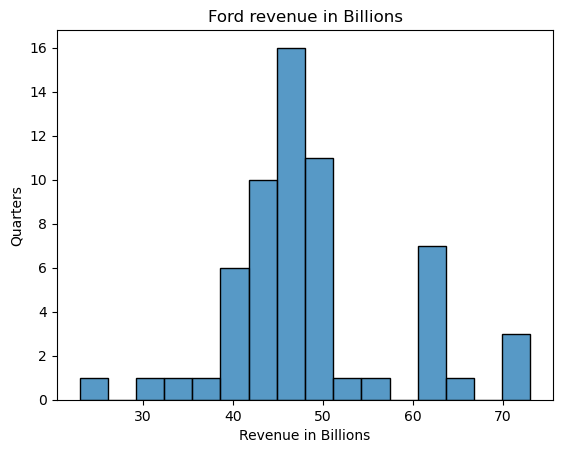

In [12]:
#use function to see
plot_that_target(train)

# Check for normalcy
$H_{0}$ The target is normally distributed.
    
$H_{a}$ The target is not normally distributed.

In [13]:
#check target for normalcy
statistic, p_value = stats.shapiro(train.adjusted_revenue_B)

# Print the test results
print("Shapiro-Wilk Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Statistic: 0.9089583158493042
p-value: 0.0002835335908457637


- based on the p-value being less than 0.05, we reject the null hypothesis and can infer that the target total revenue is not normally distributed.

# View Pairwise relationships

In [ ]:
def plot_variable_pairs(train):
    sns.set(style="ticks")
    sns.pairplot(train, kind="reg", corner = True, hue='total_revenue_B', plot_kws={'line_kws': {'color': 'red'}})
    plt.show()

In [ ]:
# use functions to see pairwise relationships
plot_variable_pairs(train)

# Uni-variate analysis

In [14]:
def univariate_visual(df):
    '''
    creates histplots for all of my columns
    '''
    num_cols = df.shape[1]
    num_rows = math.ceil(num_cols / 3)
    fig, axes = plt.subplots(num_rows, 3, figsize=(14, 4*num_rows))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i])
        axes[i].set_title(col)
        axes[i].tick_params(rotation=45)

    plt.tight_layout()
    plt.show()

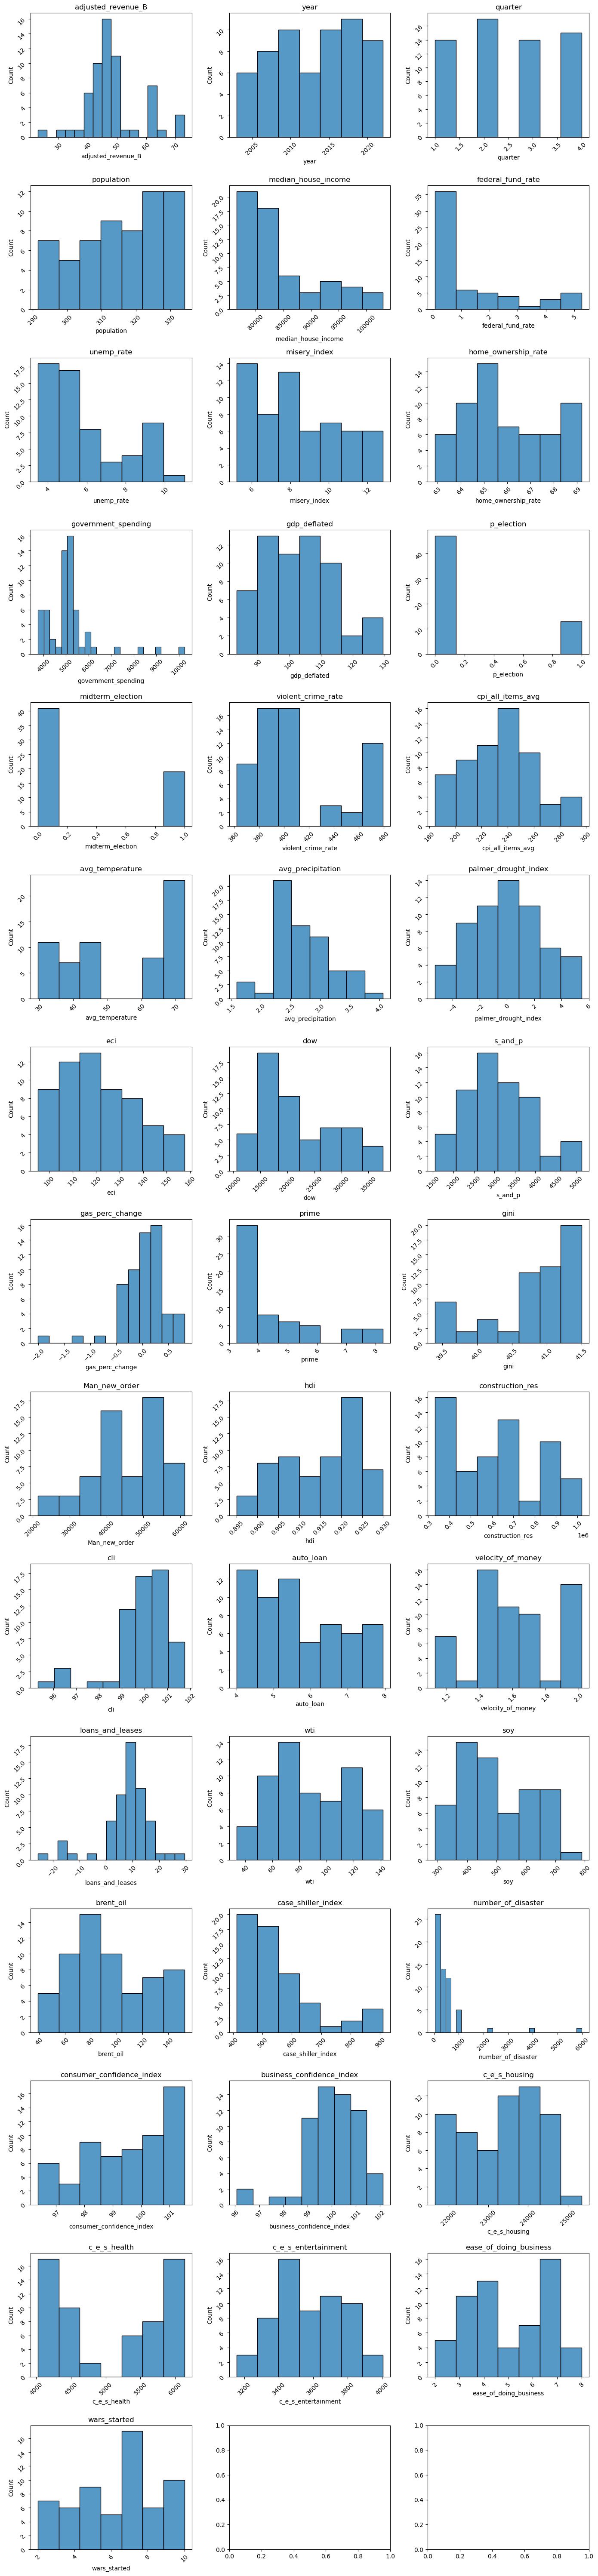

In [15]:
#run function to perform visual univariate analysis
univariate_visual(train)

# Bi-variate analysis

# Brent oil price per barrel

Does brent oil price per barrel impact revenue at Ford Motor Company?

$H_{0}$ Brent oil price per barrel does not influence revenue.

$H_{a}$ Brent oil price per barrel does influence revenue.

### Visualize

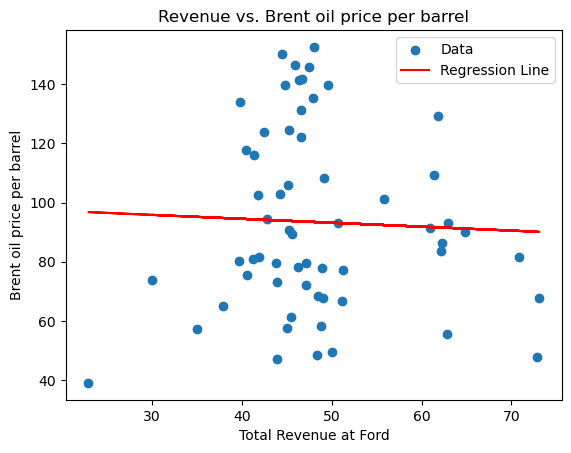

In [16]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['brent_oil'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['brent_oil'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Brent oil price per barrel')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Brent oil price per barrel')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [17]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.brent_oil)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.02617393720477911
p-value: 0.842644878871266


- based on the p-value of the pearsons r test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Company revenue is not influenced by brent oil price per barrel.
- ***this feature will not be moved into modeling***

# Employment Cost Index

Does the Employment Cost Index impact revenue at Ford Motor Company?

$H_{0}$ Employment Cost Index does not influence revenue.

$H_{a}$ Employment Cost Index does influence revenue.

### Visualize

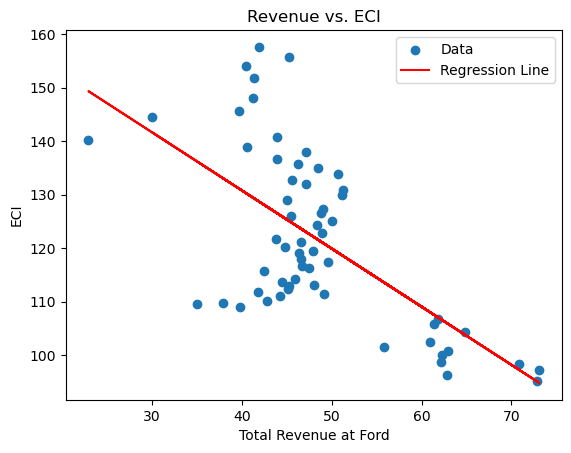

In [60]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['eci'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['eci'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. ECI')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('ECI')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [61]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.eci)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.5262017227007503
p-value: 1.573696989578067e-05


- based on the p-value of the spearmans rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Company revenue is influenced by ECI.
- ***this feature will be moved into modeling***

# Gross domestic product implicit price deflator

Does the Gross domestic product implicit price deflator impact revenue at Ford Motor Company?

$H_{0}$ Gross domestic product implicit price deflator does not influence revenue.

$H_{a}$ Gross domestic product implicit price deflator does influence revenue.

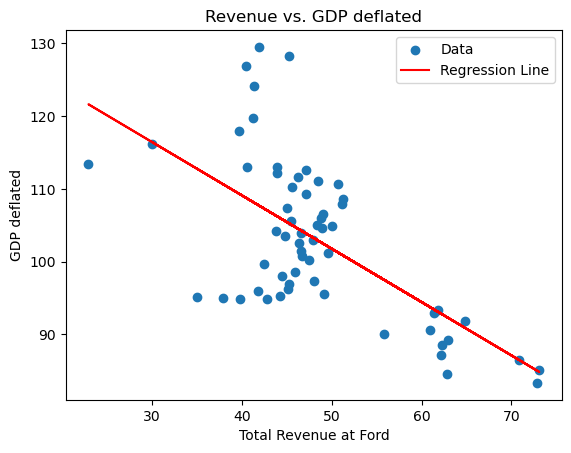

In [62]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['gdp_deflated'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['gdp_deflated'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. GDP deflated')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('GDP deflated')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [63]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.gdp_deflated)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.5287024173381495
p-value: 1.409413633257795e-05


- based on the p-value of the spearmans test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Companany revenue is influenced by the Gross domestic product implicit price deflator.
- ***this feature will be used in modeling***.

# Consumer Price Index

Does the Consumer Price Index impact revenue at Ford Motor Company?

$H_{0}$ Consumer Price Index does not influence revenue.

$H_{a}$ Consumer Price Index does influence revenue.

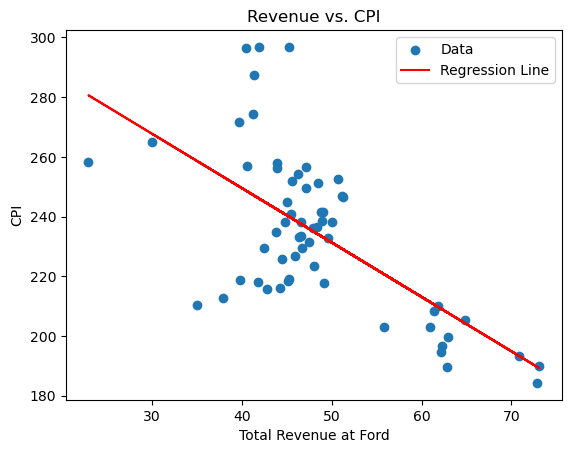

In [64]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['cpi_all_items_avg'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['cpi_all_items_avg'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. CPI')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('CPI')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [65]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.cpi_all_items_avg)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.531793995522223
p-value: 1.2283285746243726e-05


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Companany revenue is influenced by Consumer Price Index.
- ***this feature will be used in modeling.***

# Government spending

Does Government spending impact revenue at Ford Motor Company?

$H_{0}$ Government spending does not influence revenue.

$H_{a}$ Government spending does influence revenue.

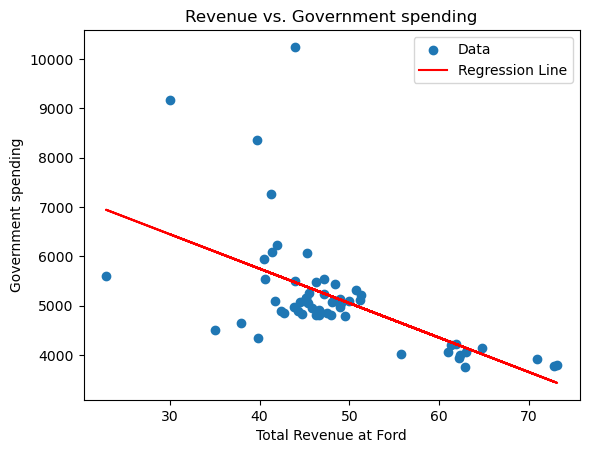

In [66]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['government_spending'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['government_spending'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Government spending')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Government spending')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [67]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.government_spending)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.5772158933036956
p-value: 1.3798353758211906e-06


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Companany revenue is influenced by Government spending.
- ***this feature will be used in modeling.***

# Median household income

Does Median household income impact revenue at Ford Motor Company?

$H_{0}$ Median household income does not influence revenue.

$H_{a}$ Median household income does influence revenue.



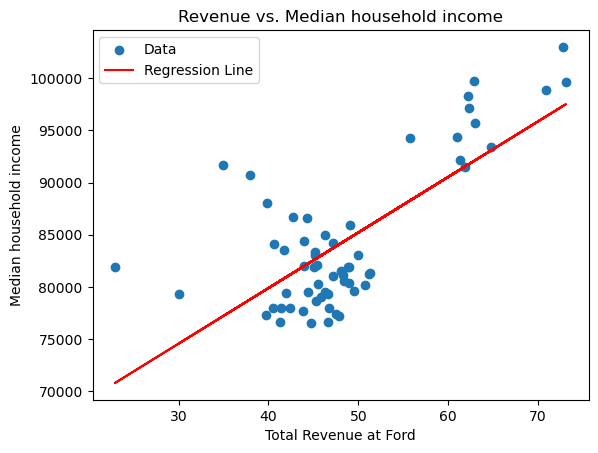

In [68]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['median_house_income'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['median_house_income'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Median household income')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Median household income')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [69]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.median_house_income)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.4597388163378717
p-value: 0.00021954405118066725


- based on the p-value of the spearmans correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Companany revenue is influenced by Median household income.
- ***this feature will be used in modeling***

# Federal fund rate

Does the Federal fund rate impact revenue at Ford Motor Company?

$H_{0}$ Federal fund rate does not influence revenue.

$H_{a}$ Federal fund rate does influence revenue.

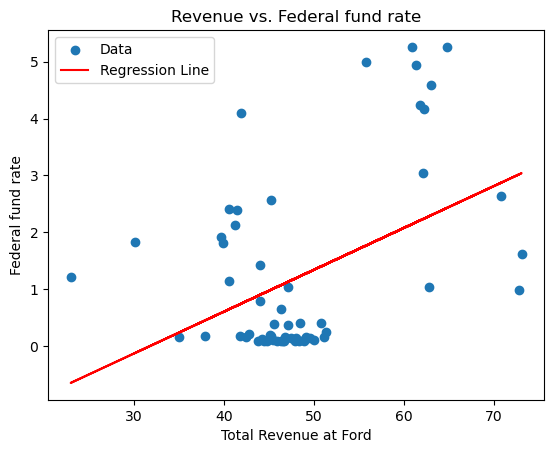

In [70]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['federal_fund_rate'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['federal_fund_rate'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Federal fund rate')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Federal fund rate')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [71]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.federal_fund_rate)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.15032896117618913
p-value: 0.25159773855378276


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Companany revenue is not influenced by Federal fund rate.
- ***this feature will not be used in modeling.***

# Dow Jones Industrial Average

Does the Dow impact revenue at Ford Motor Company?

$H_{0}$ The Dow does not influence revenue.

$H_{a}$ The Dow does influence revenue.

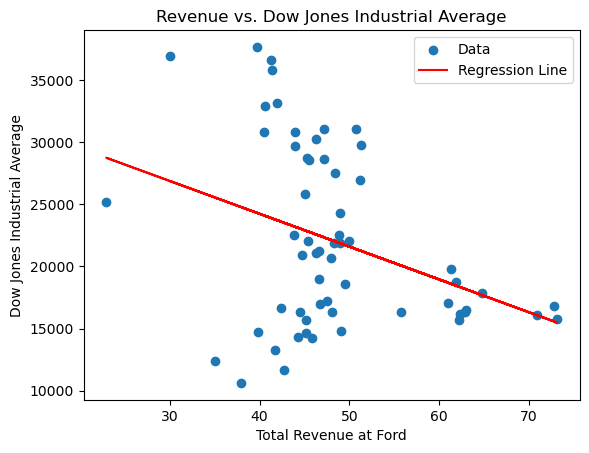

In [72]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['dow'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['dow'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Dow Jones Industrial Average')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Dow Jones Industrial Average')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [73]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.dow)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.21355932203389838
p-value: 0.10134094689044772


- based on the p-value of the spearmans correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Company revenue is not influenced by the Dow.
- ***this feature will not be used in modeling***

# S&P 500 Average

Does the S&P 500 Average impact revenue at Ford Motor Company?

$H_{0}$ S&P 500 Average does not influence revenue.

$H_{a}$ S&P 500 Average does influence revenue.

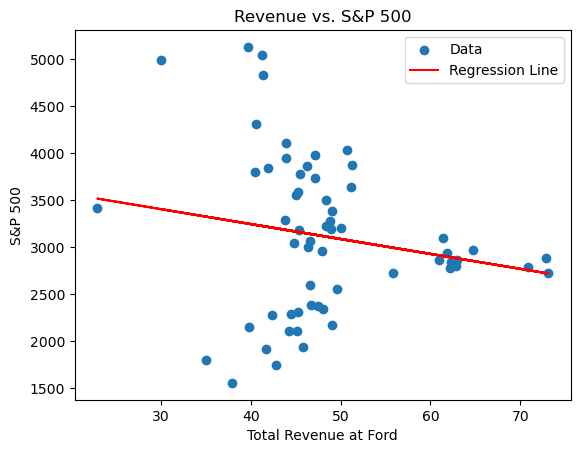

In [74]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['s_and_p'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['s_and_p'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. S&P 500')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('S&P 500')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [75]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.s_and_p)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.11914420672409005
p-value: 0.36456090452913925


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Company revenue is not influenced by the S&P 500.
- ***we will not push this feature into our model***

# Gas price change percentage

Does percentage gas price change impact revenue at Ford Motor Company?

$H_{0}$ Percentage gas price change does not influence revenue.

$H_{a}$ Percentage gas price change does influence revenue.

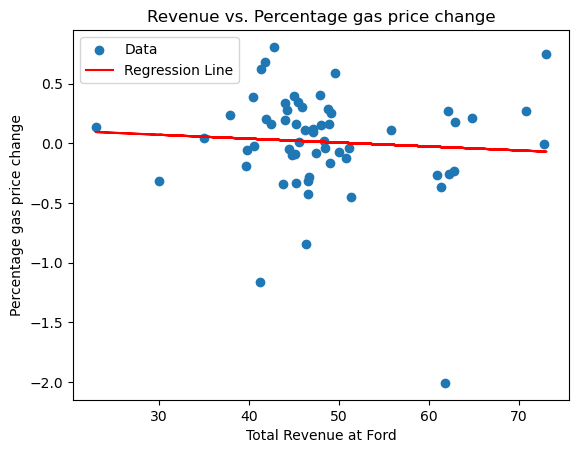

In [76]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['gas_perc_change'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['gas_perc_change'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Percentage gas price change')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Percentage gas price change')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [77]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.gas_perc_change)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.08852459016393444
p-value: 0.5011977906994269


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Company revenue is not influenced by percentage gas price change.
- ***we will not push this feature into our model***

# Prime bank loan rate

Does the Prime bank loan rate impact revenue at Ford Motor Company?

$H_{0}$ Prime bank loan rate does not influence revenue.

$H_{a}$ Prime bank loan rate does influence revenue.

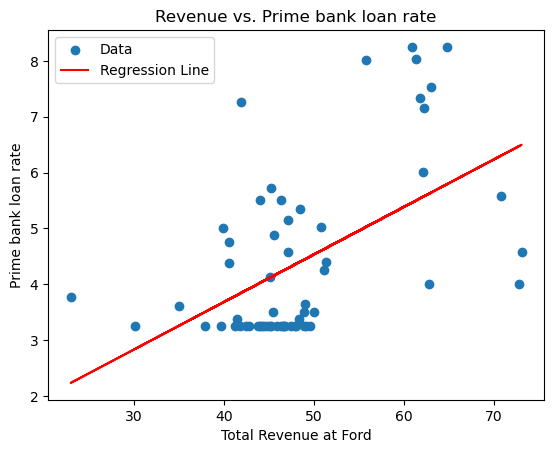

In [78]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['prime'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['prime'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Prime bank loan rate')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Prime bank loan rate')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [79]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.prime)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.44839401266579776
p-value: 0.000326940330889613


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Company revenue is influenced by the Prime bank loan rate.
- ***we will push this feature into our model***

# Gini index

Does the Gini index impact revenue at Ford Motor Company?

$H_{0}$ Gini index does not influence revenue.

$H_{a}$ Gini index does influence revenue.

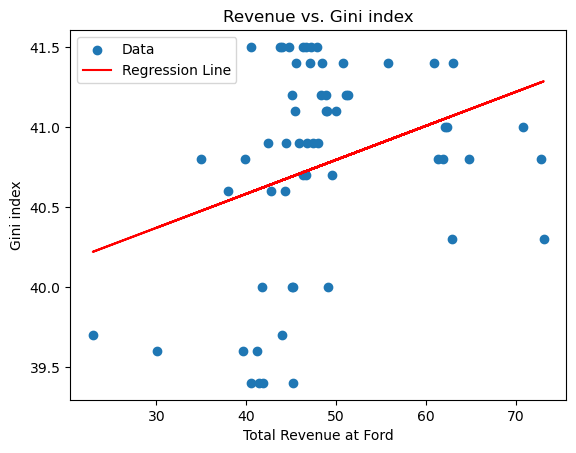

In [80]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['gini'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['gini'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Gini index')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Gini index')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [81]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.gini)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.32638107578004394
p-value: 0.010925646061030867


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Company revenue is influenced by the Gini index.
- ***we will push this feature into our model***

# Manufacturer new orders

Do Manufacturer new orders impact revenue at Ford Motor Company?

$H_{0}$ Manufacturer new orders does not influence revenue.

$H_{a}$ Manufacturer new orders influence revenue.



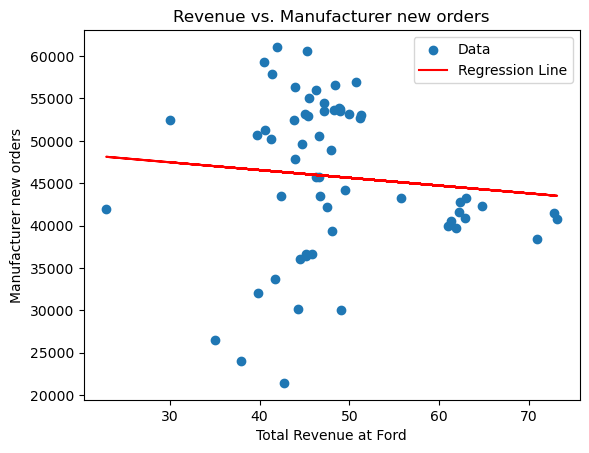

In [82]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['Man_new_order'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['Man_new_order'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Manufacturer new orders')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Manufacturer new orders')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [83]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.Man_new_order)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.05179216449013616
p-value: 0.6943157177783175


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Company revenue is not influenced by manufacturer new orders.
- ***we will not push this feature into our model***

# Human development index

Does the Human development index impact revenue at Ford Motor Company?

$H_{0}$ Human development index does not influence revenue.

$H_{a}$ Human development index does influence revenue.

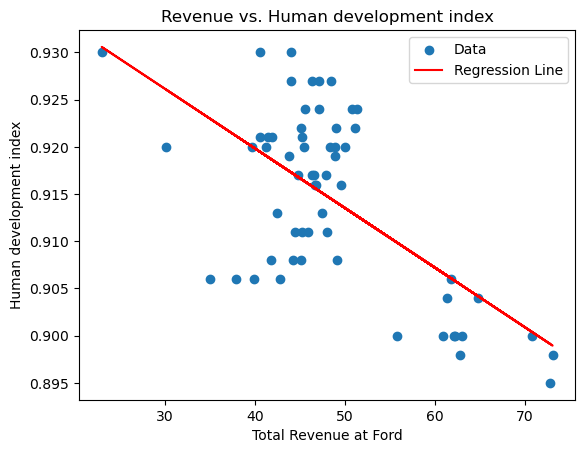

In [84]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['hdi'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['hdi'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Human development index')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Human development index')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [85]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.hdi)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.4071998547185206
p-value: 0.0012423396353378009


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Company revenue is influenced by the human development index.
- ***we will push this feature into our model***

# Residential Construction

Does residential construction impact revenue at Ford Motor Company?

$H_{0}$ Residential construction does not influence revenue.

$H_{a}$ Residential construction does influence revenue.

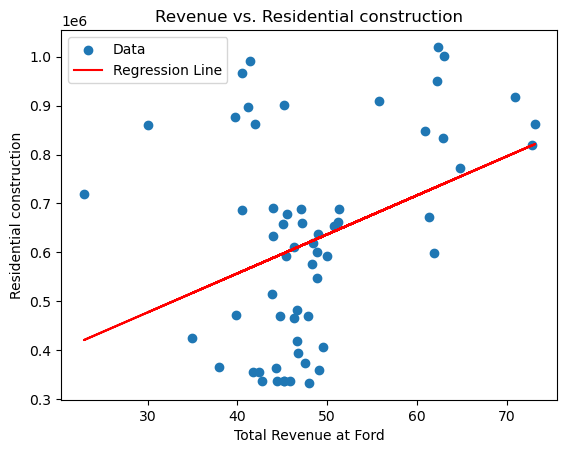

In [86]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['construction_res'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['construction_res'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Residential construction')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Residential construction')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [87]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.construction_res)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.24456793553764938
p-value: 0.0596632938790684


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Company revenue is not influenced by residential constuction.
- ***we will not push this feature into our model***

# Composite leading indicator

Does the composite leading indicator impact revenue at Ford Motor Company?

$H_{0}$ Composite leading indicator does not influence revenue.

$H_{a}$ Composite leading indicator does influence revenue.


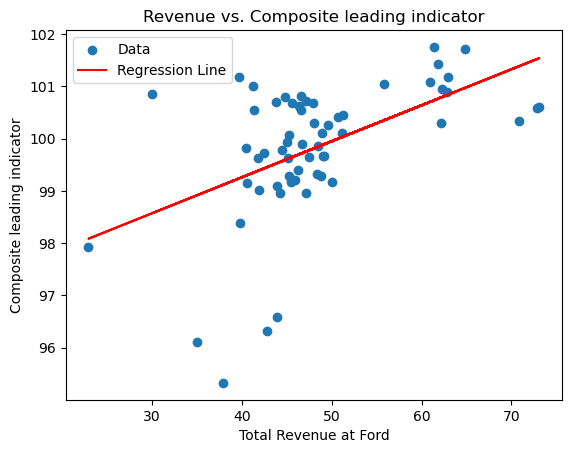

In [88]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['cli'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['cli'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Composite leading indicator')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Composite leading indicator')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [89]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.cli)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.4829674909697139
p-value: 9.290076426167701e-05


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Company revenue is influenced by the composite leading indicator.
- ***we will push this feature into our model***

# Auto loan rate

Do auto loan rates impact revenue at Ford Motor Company?

$H_{0}$ Auto loan rates do not influence revenue.

$H_{a}$ Auto loan rates do influence revenue.

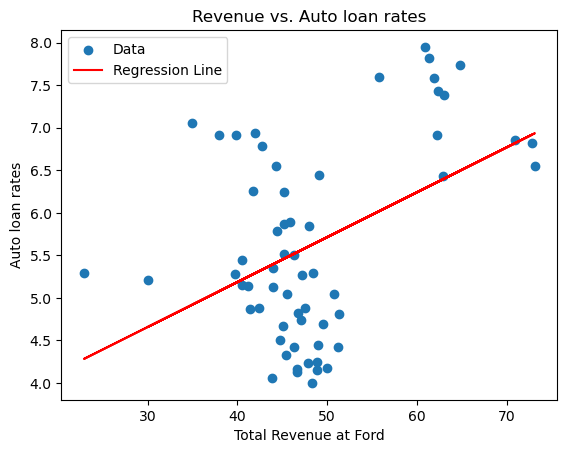

In [90]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['auto_loan'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['auto_loan'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Auto loan rates')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Auto loan rates')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [91]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.auto_loan)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.15561823633922736
p-value: 0.23510686875356357


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Company revenue is not influenced by auto loan rates.
- ***we will not push this feature into our model***

# Velocity of money

Does velocity of money impact revenue at Ford Motor Company?

$H_{0}$ Velocity of money does not influence revenue.

$H_{a}$ Velocity of money does influence revenue.

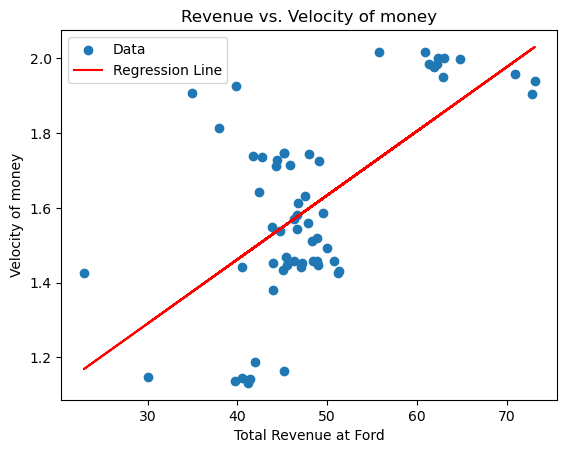

In [92]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['velocity_of_money'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['velocity_of_money'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Velocity of money')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Velocity of money')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [93]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.velocity_of_money)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.49885380095292003
p-value: 4.973874775060787e-05


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Company revenue is influenced by the velocity of money.
- ***we will push this feature into our model***

# Loans and leases other than vehicle and real estate

Do loans and leases other than vehicle and real estate impact revenue at Ford Motor Company?

$H_{0}$ Loans and leases other than vehicle and real estate does not influence revenue.

$H_{a}$ Loans and leases other than vehicle and real estate does influence revenue.

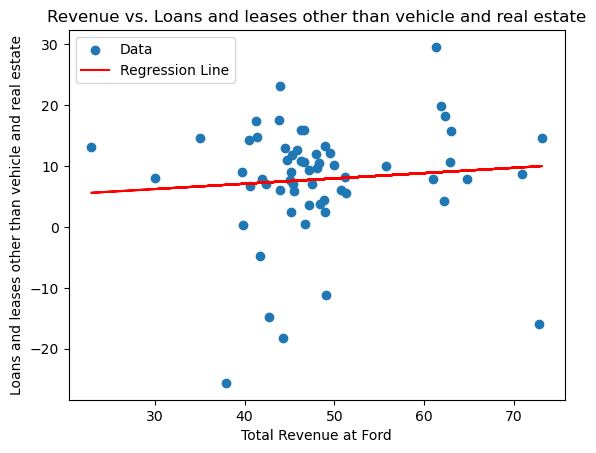

In [94]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['loans_and_leases'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['loans_and_leases'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Loans and leases other than vehicle and real estate')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Loans and leases other than vehicle and real estate')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [95]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.loans_and_leases)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: 0.05701979867874554
p-value: 0.6652074592305847


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Company revenue is not influenced by loans and leases other than vehicle and real estate.
- ***we will not push this feature into our model***

# West Texas intermediate oil

Does West Texas intermediate oil impact revenue at Ford Motor Company?

$H_{0}$ West Texas intermediate oil does not influence revenue.

$H_{a}$ West Texas intermediate oil does influence revenue.

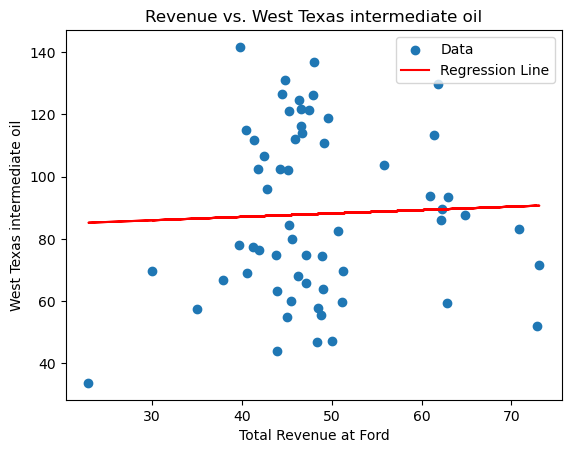

In [96]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['wti'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['wti'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. West Texas intermediate oil')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('West Texas intermediate oil')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [97]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.wti)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.0034454015004167834
p-value: 0.97915634312681


- based on the p-value of the spearman's rank correlation test being greater than 0.05, we fail to reject the null hypothesis and can infer that Ford Motor Company revenue is not influenced by West Texas intermediate oil.
- ***we will not push this feature into our model***

# Soy bean prices

Do soy bean prices impact revenue at Ford Motor Company?

$H_{0}$ Soy bean prices do not influence revenue.

$H_{a}$ Soy bean prices do influence revenue.

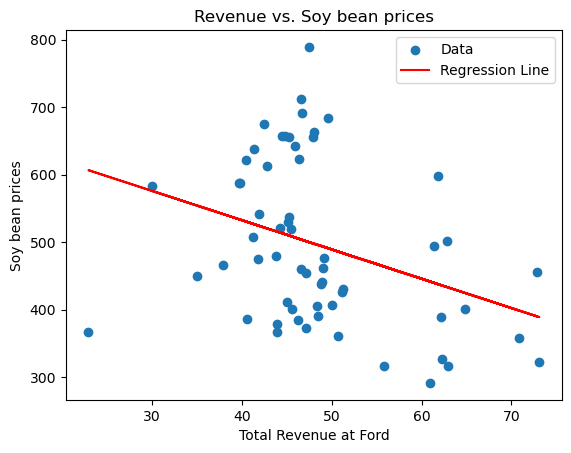

In [98]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['soy'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['soy'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Soy bean prices')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Soy bean prices')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [99]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.soy)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.3625451514309531
p-value: 0.004417044998601676


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Company revenue is influenced by soy bean prices.
- ***we will push this feature into our model***

# Misery index

Does the misery index impact revenue at Ford Motor Company?

$H_{0}$ The misery index does not influence revenue.

$H_{a}$ The misery index does influence revenue.

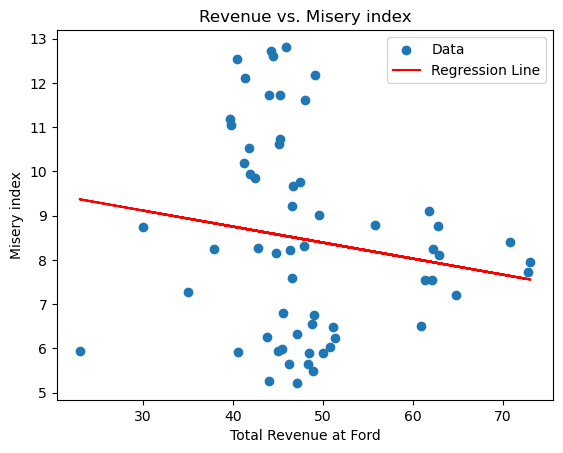

In [100]:
# Scatter plot to visualize the relationship
plt.scatter(train['adjusted_revenue_B'], train['misery_index'], label='Data')

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(train['adjusted_revenue_B'], train['misery_index'])
line = slope * train['adjusted_revenue_B'] + intercept

# Plot the regression line
plt.plot(train['adjusted_revenue_B'], line, color='red', label='Regression Line')

# Set plot title and labels
plt.title('Revenue vs. Misery index')
plt.xlabel('Total Revenue at Ford')
plt.ylabel('Misery index')

# Add legend
plt.legend()

# Display the plot
plt.show()

### Stats test

In [101]:
# Run Spearman's rank correlation test
correlation, p_value = stats.spearmanr(train.adjusted_revenue_B, train.misery_index)

# Print the test results
print("Spearman's Rank Correlation Test")
print("Correlation Coefficient:", correlation)
print("p-value:", p_value)

Spearman's Rank Correlation Test
Correlation Coefficient: -0.2591275354265074
p-value: 0.04558005696010349


- based on the p-value of the spearman's rank correlation test being less than 0.05, we reject the null hypothesis and can infer that Ford Motor Company revenue is influenced by the misery index.
- ***we will push this feature into our model***

#### Exploration Summary
- visualized
- checked target for normalcy to determine parametric or non-parametric testing
    - target is not normally distributed, therefore spearman's rank correlation test was used for all features
- found that 8 of 21 features tested are significant to Ford motor company's revenue


# Multi-variate analysis


In [125]:
def multivariate_exploration(train, target_variable):
    '''
    Perform different combinations of visualizations to explore relationships with the target variable
    '''

    # Numeric variables for scatter plots
    numeric_vars = train.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Remove target variable from the list of numeric variables
    numeric_vars.remove(target_variable)

    # Plot scatter plots for numeric variables
    for var in numeric_vars:
        sns.scatterplot(x=var, y=target_variable, data=train)
        plt.xlabel(var)
        plt.ylabel(target_variable)
        plt.title(f'{var} vs. {target_variable}')
        plt.show()

    # Categorical variables for box plots
    categorical_vars = train.select_dtypes(include=['object']).columns.tolist()

    # Plot box plots for categorical variables
    for var in categorical_vars:
        sns.boxplot(x=var, y=target_variable, data=train)
        plt.xlabel(var)
        plt.ylabel(target_variable)
        plt.title(f'{var} vs. {target_variable}')
        plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 10))
    corr = train.corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Heatmap')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Pairplot for selected variables
    selected_vars = numeric_vars[:4]  # Select first 4 numeric variables for pairplot
    selected_vars.append(target_variable)
    sns.pairplot(df[selected_vars], diag_kind='hist', plot_kws={'alpha': 0.5})
    plt.show()

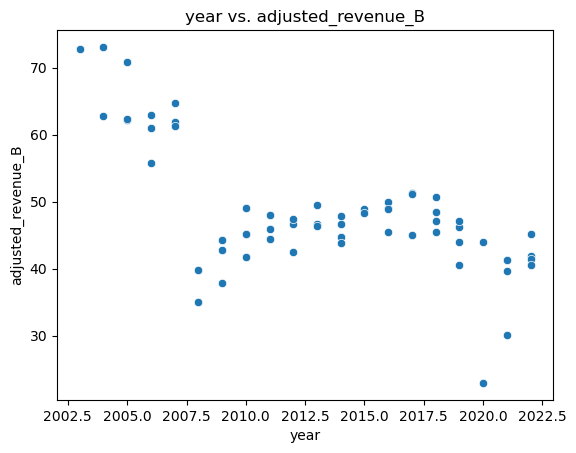

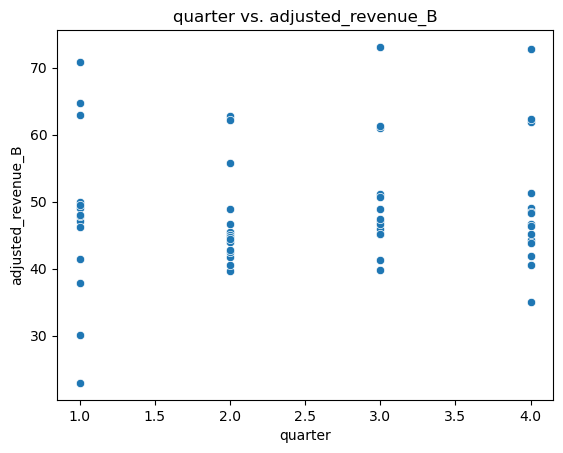

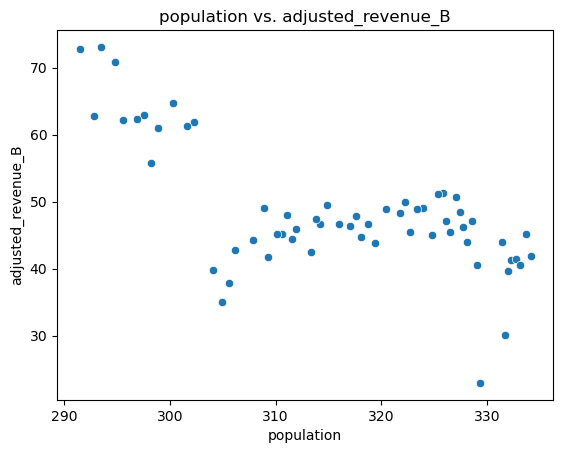

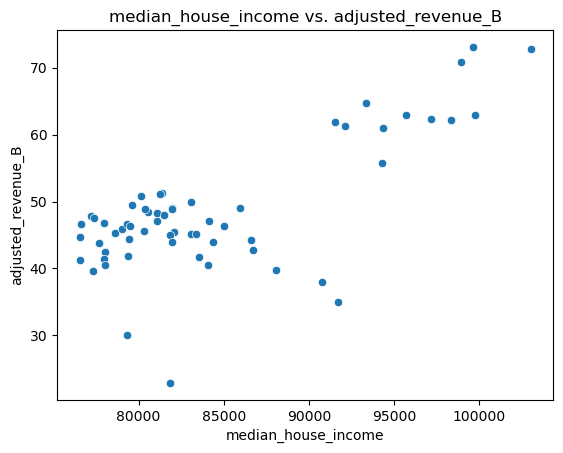

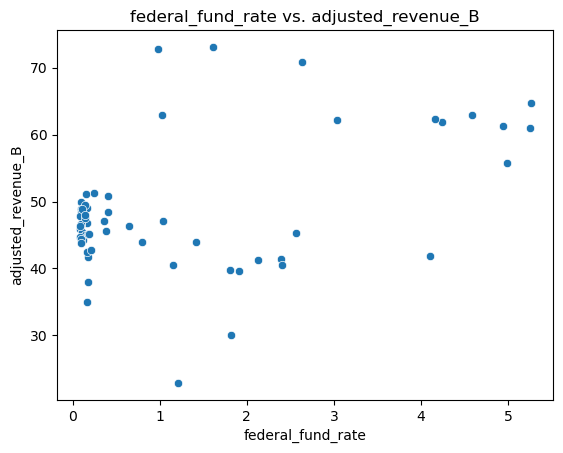

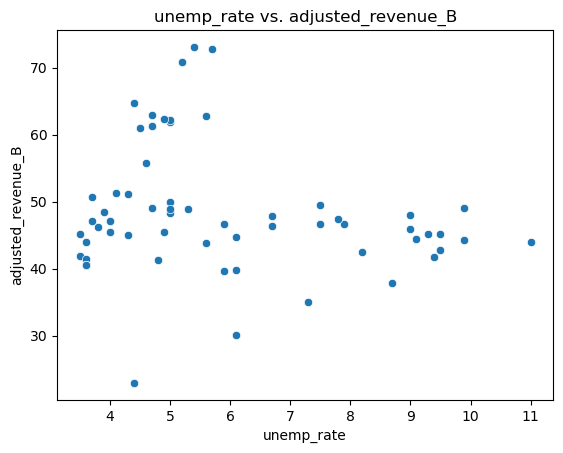

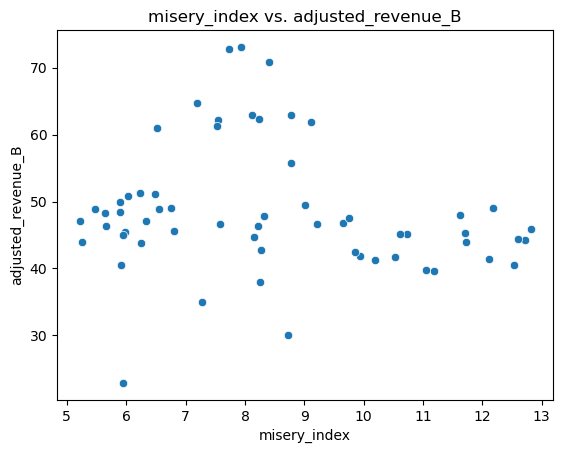

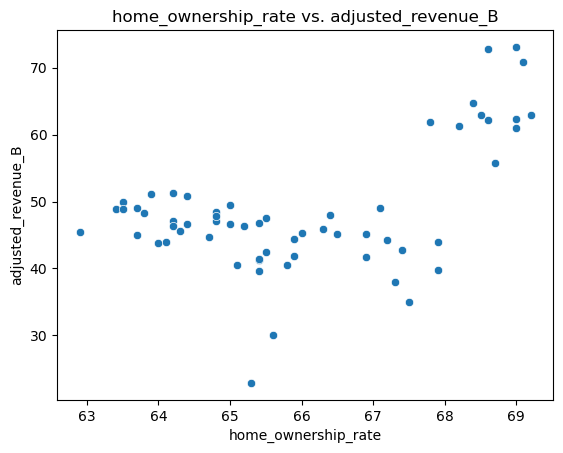

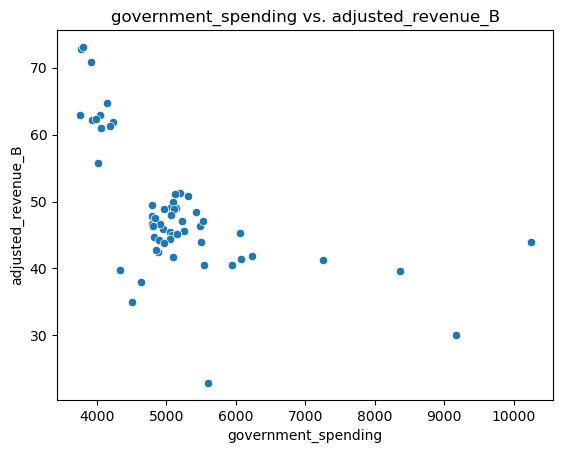

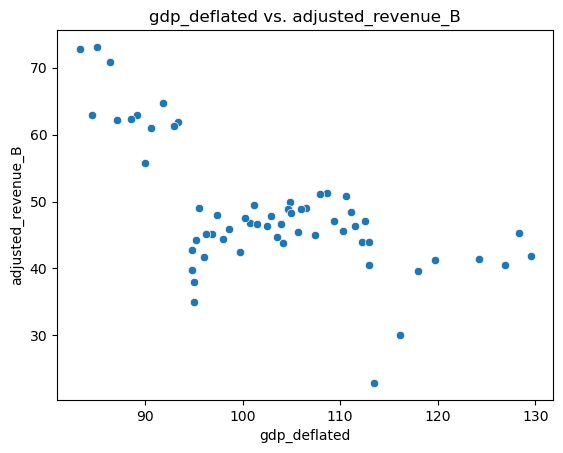

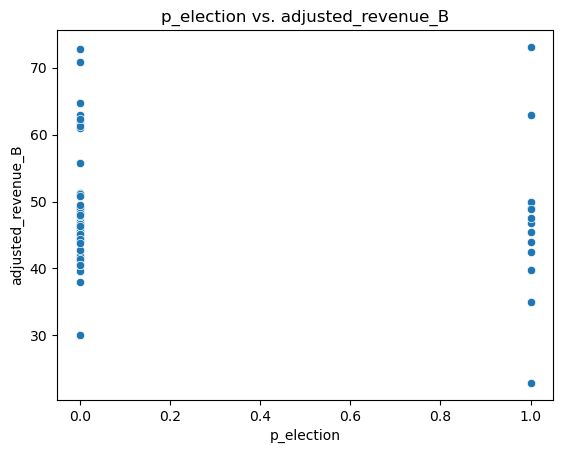

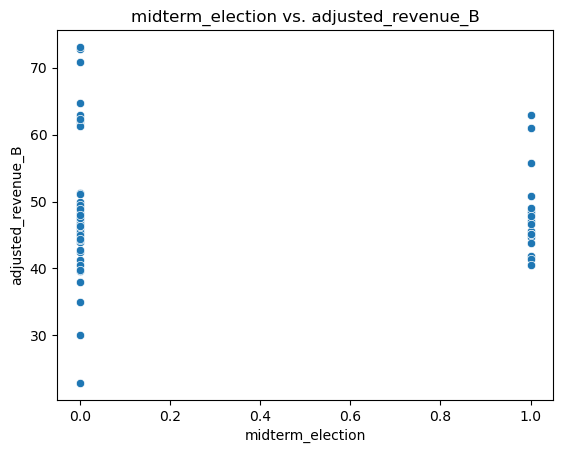

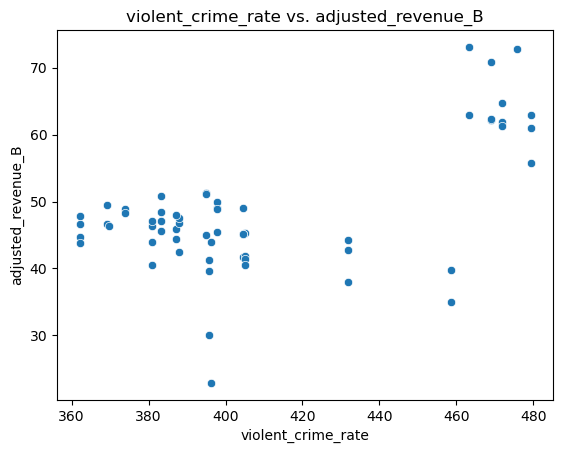

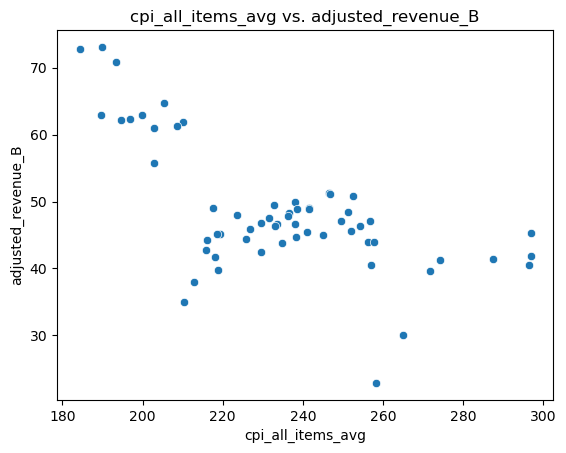

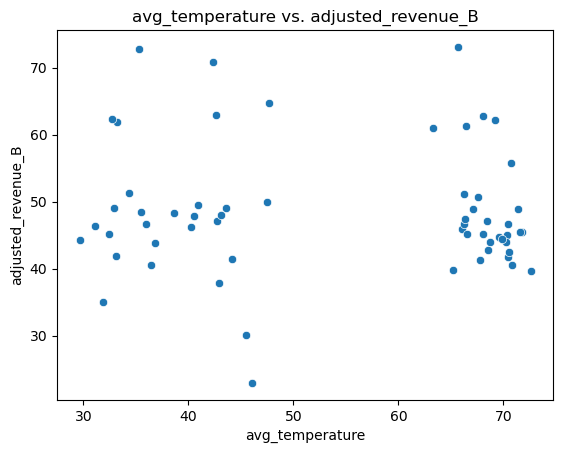

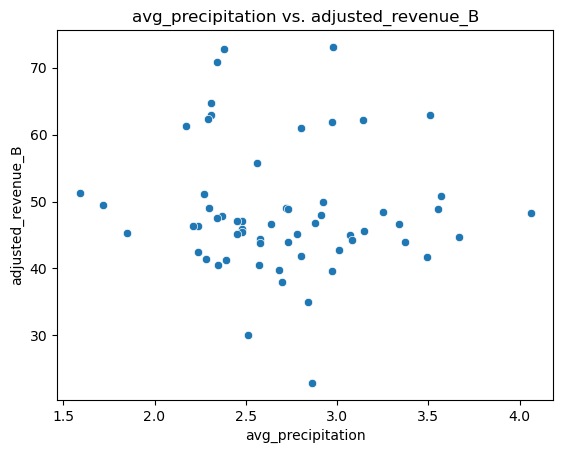

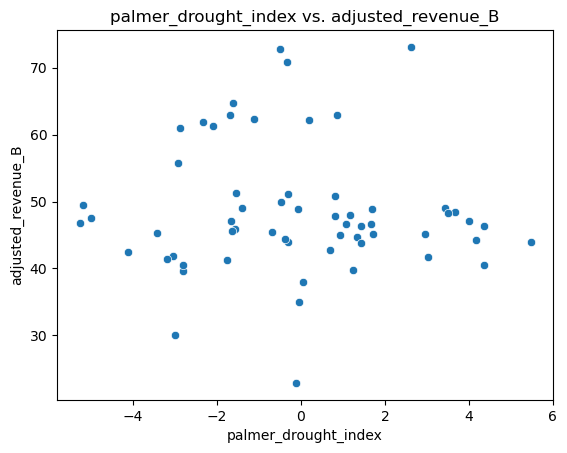

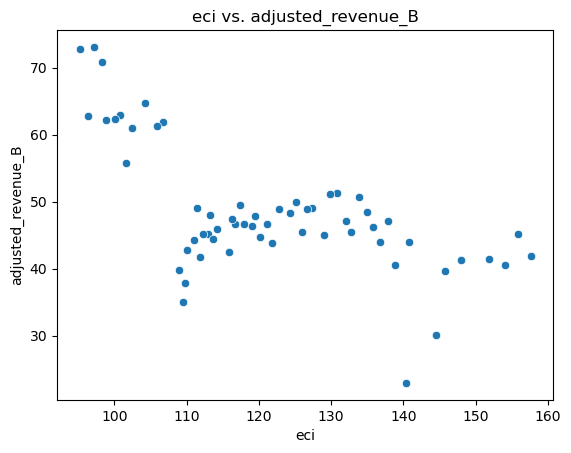

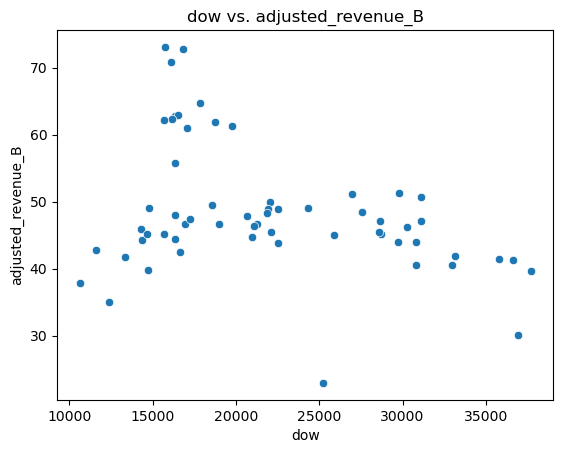

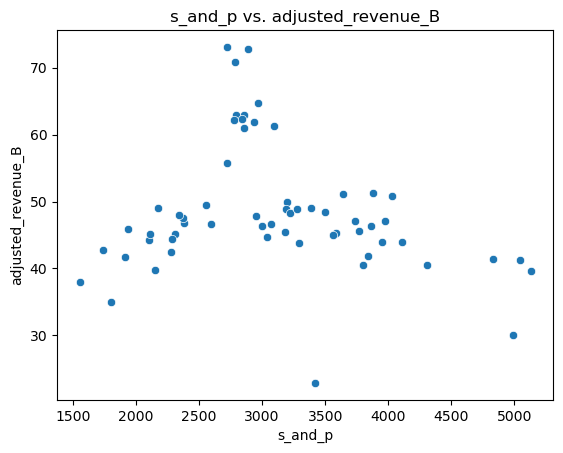

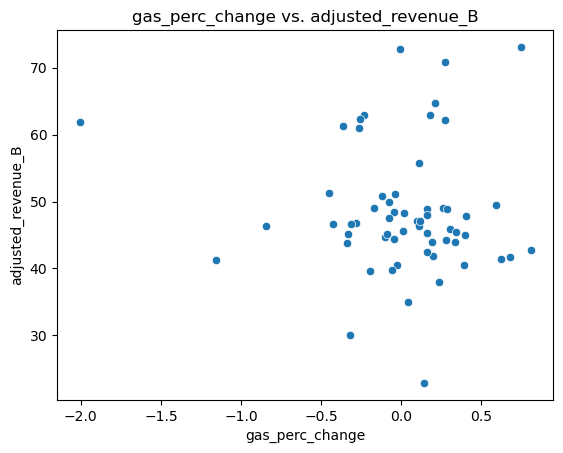

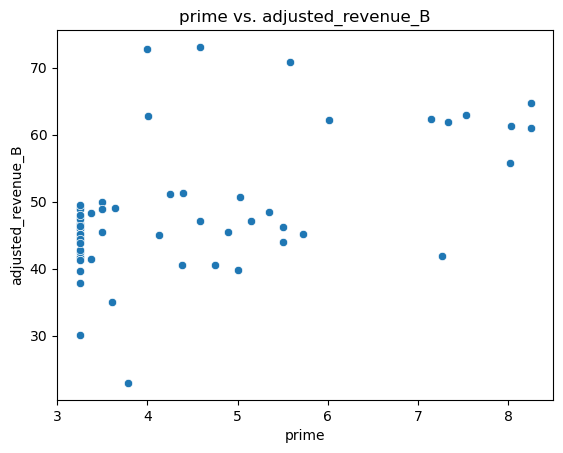

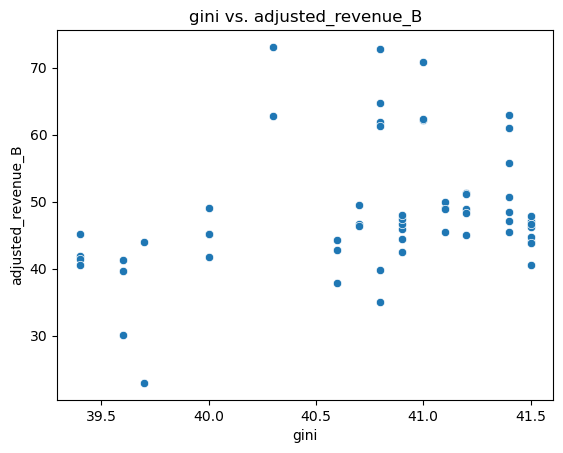

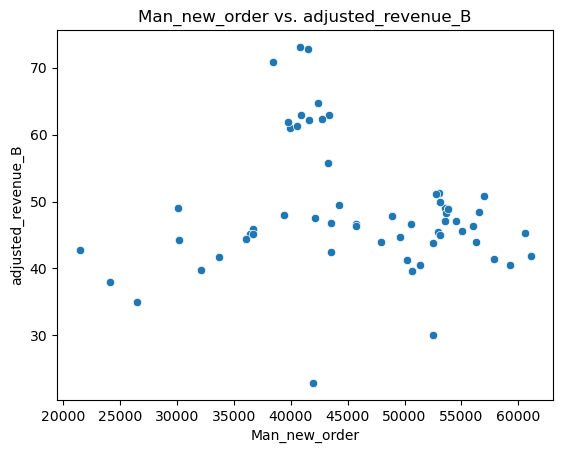

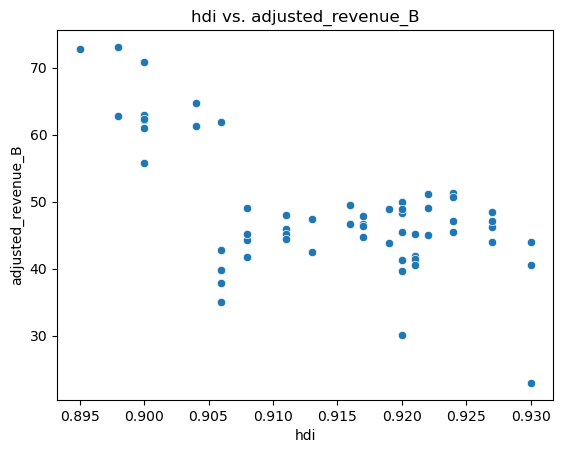

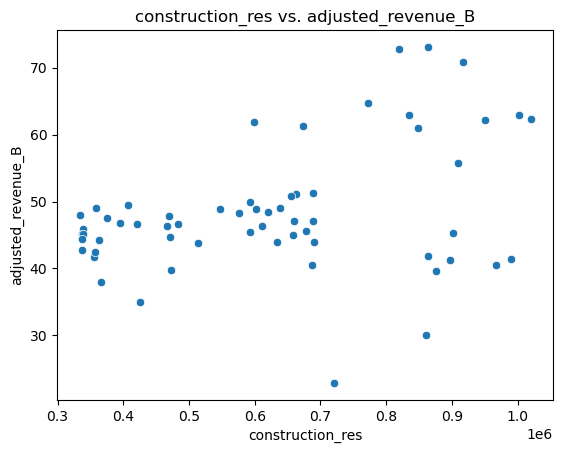

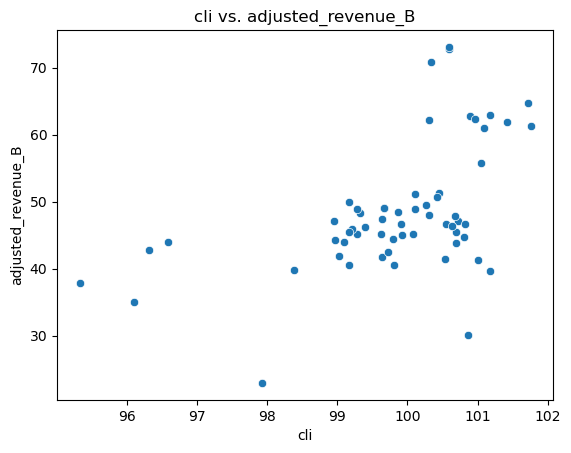

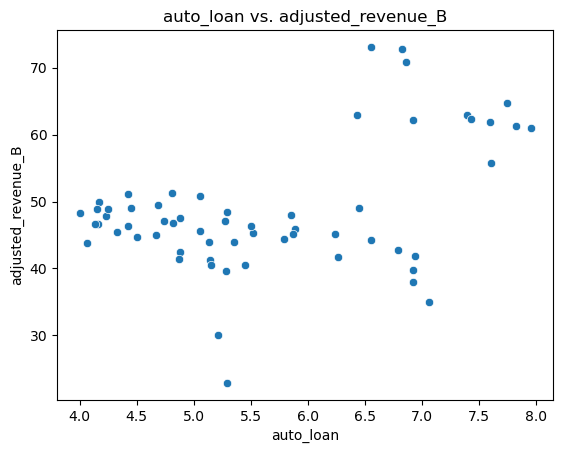

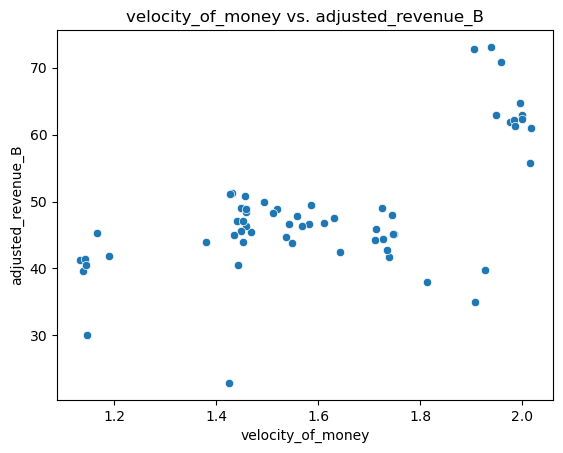

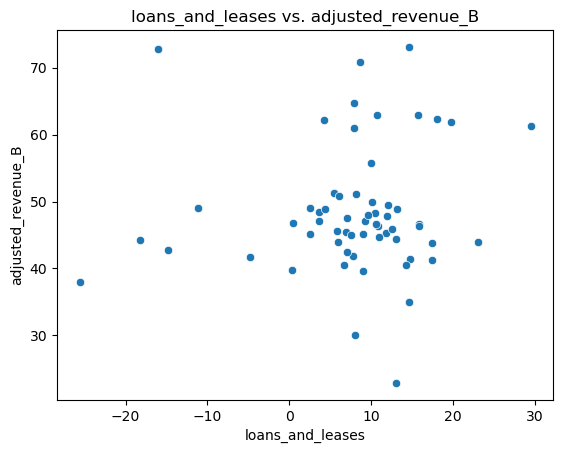

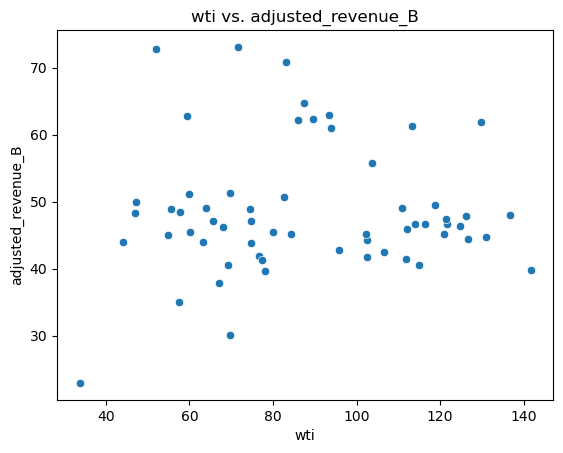

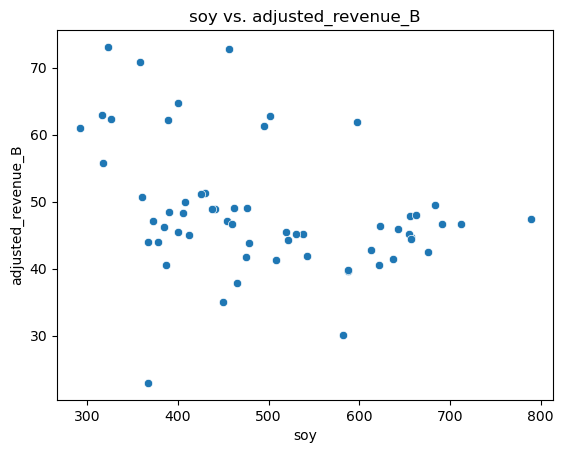

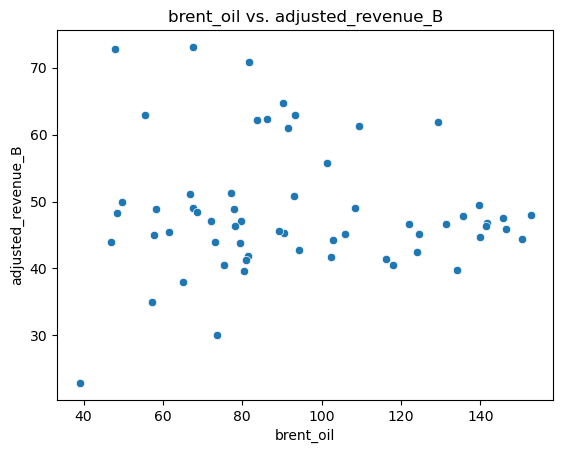

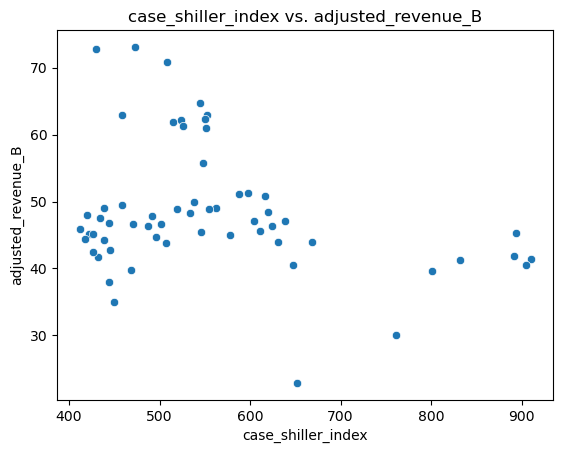

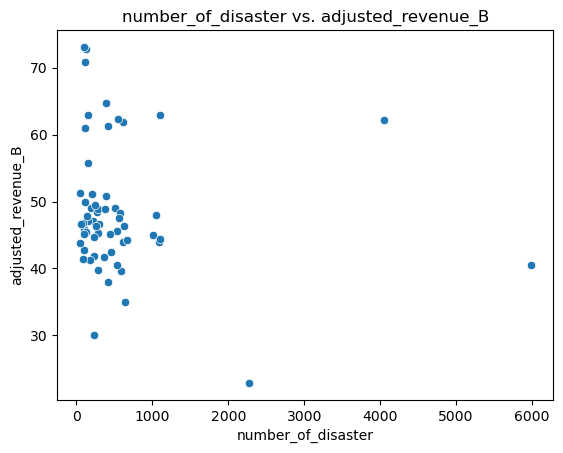

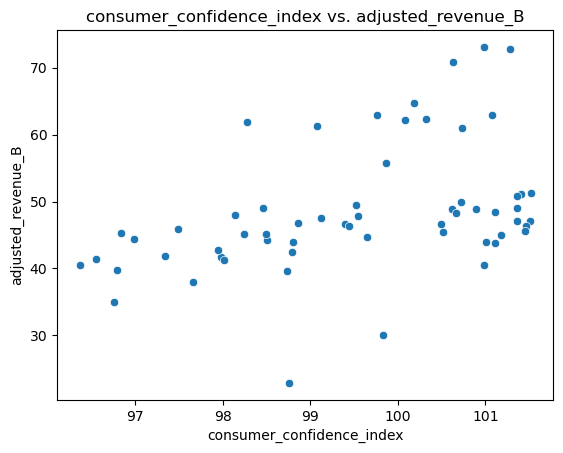

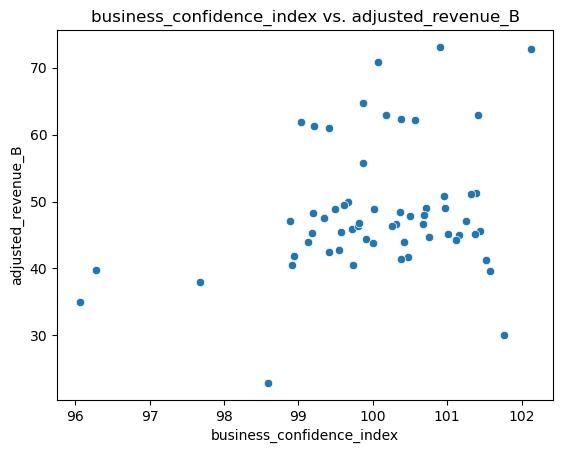

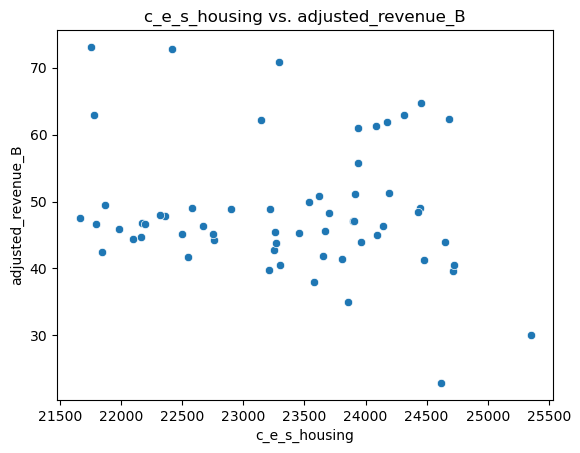

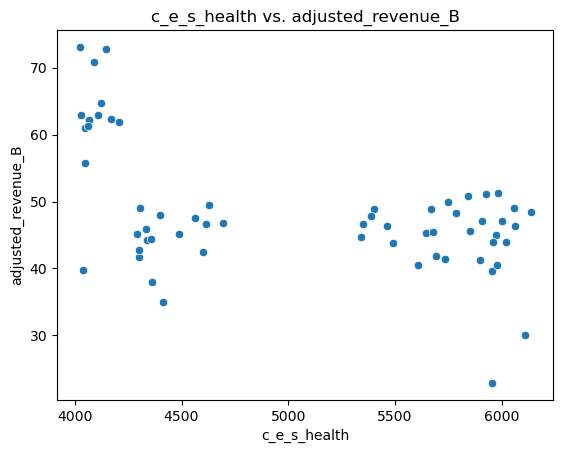

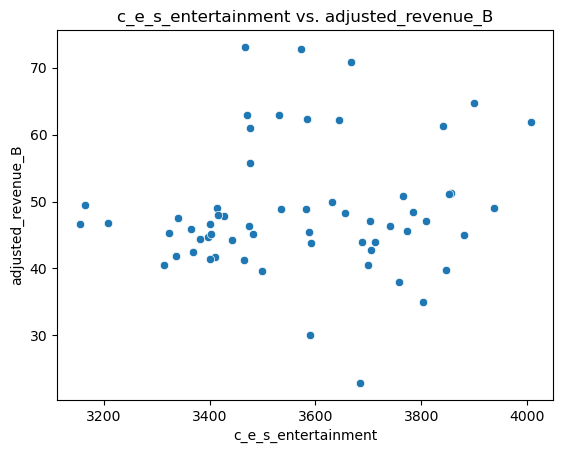

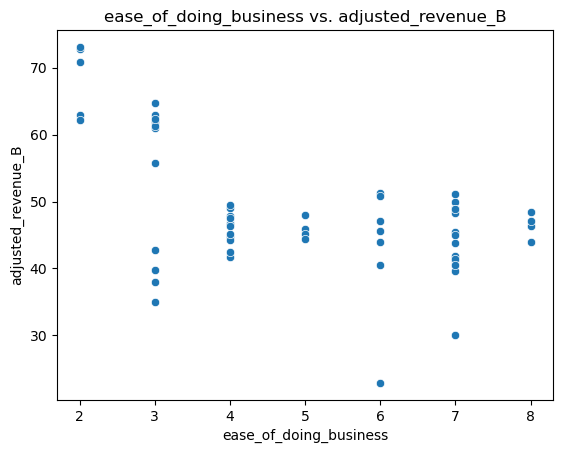

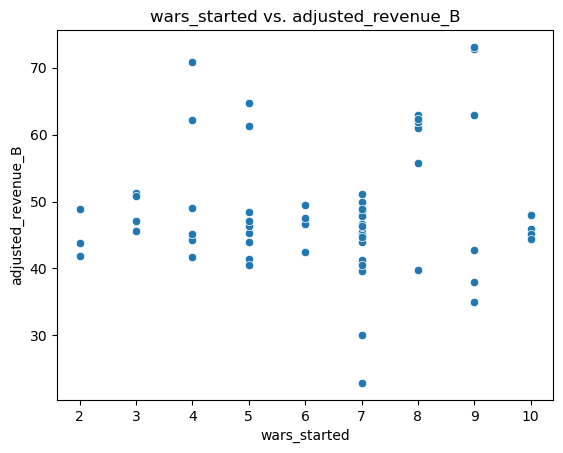

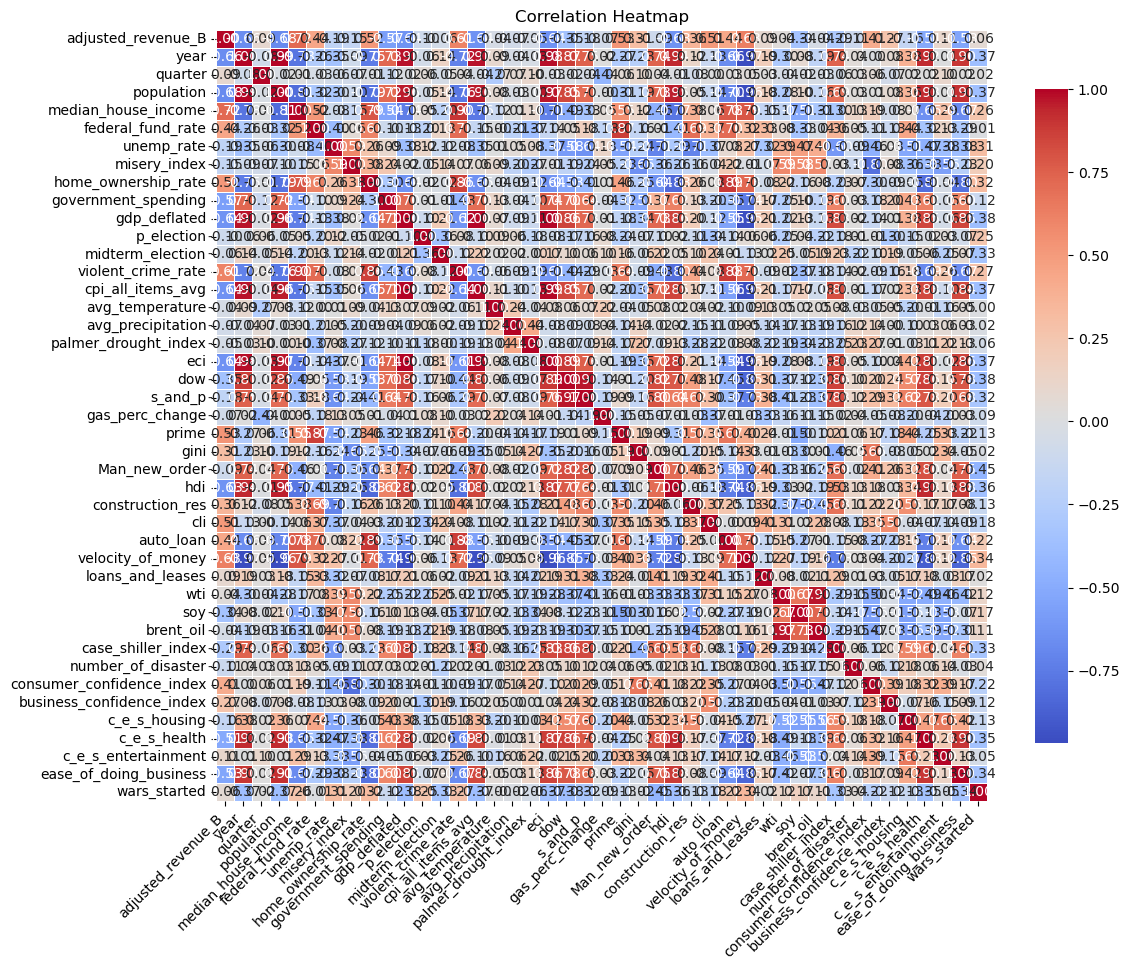

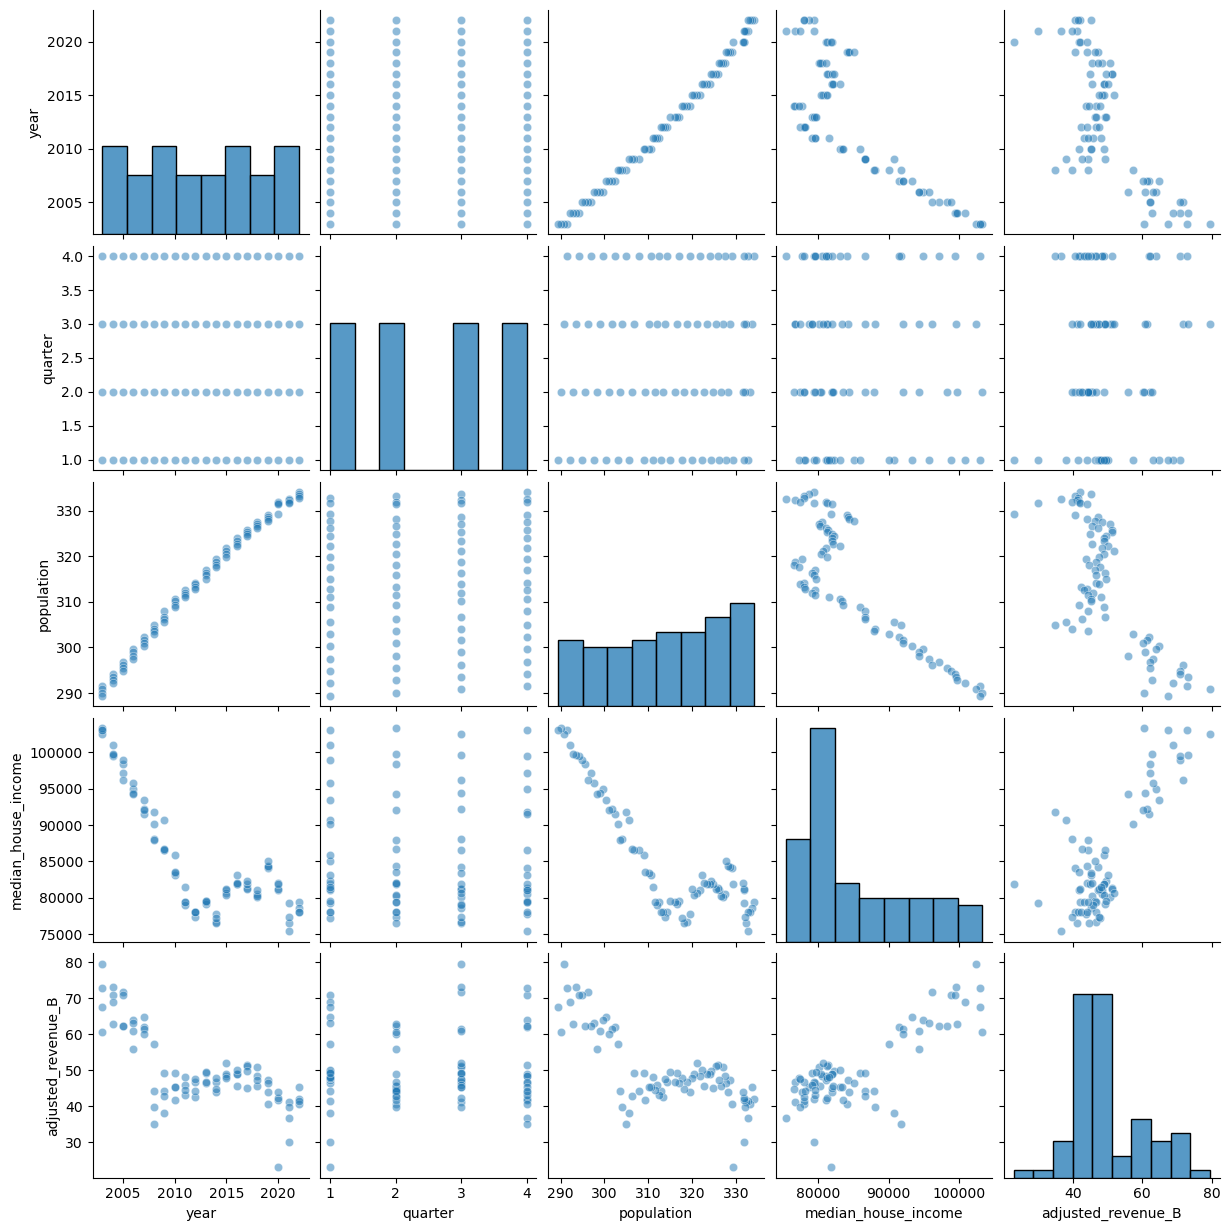

In [126]:
multivariate_exploration(train, 'adjusted_revenue_B')

# prepare data for modeling

In [127]:
def scaled_df(train, test):
    """
    This function scales the train, validate, and test data using the MinMaxScaler.

    Parameters:
    train (pandas DataFrame): The training data.
    validate (pandas DataFrame): The validation data.
    test (pandas DataFrame): The test data.

    Returns:
    Tuple of:
        X_train_scaled (pandas DataFrame): The scaled training data.
        X_validate_scaled (pandas DataFrame): The scaled validation data.
        X_test_scaled (pandas DataFrame): The scaled test data.
        y_train (pandas Series): The target variable for the training data.
        y_validate (pandas Series): The target variable for the validation data.
        y_test (pandas Series): The target variable for the test data.
    """

    X_train = train[['population','median_house_income',
       'misery_index', 'government_spending',
       'gdp_deflated', 'violent_crime_rate',
       'cpi_all_items_avg','eci', 'prime', 
       'gini', 'hdi', 'cli', 'velocity_of_money', 
       'soy', 'consumer_confidence_index',
       'c_e_s_health', 'ease_of_doing_business']]
    X_test = test[['population','median_house_income',
       'misery_index', 'government_spending',
       'gdp_deflated', 'violent_crime_rate',
       'cpi_all_items_avg','eci', 'prime', 
       'gini', 'hdi', 'cli', 'velocity_of_money', 
       'soy', 'consumer_confidence_index',
       'c_e_s_health', 'ease_of_doing_business']]

    y_train = train.adjusted_revenue_B
    y_test = test.adjusted_revenue_B

    #making our scaler
    scaler = MinMaxScaler()
    #fitting our scaler 
    # AND!!!!
    #using the scaler on train
    X_train_scaled = scaler.fit_transform(X_train)
    #using our scaler on test
    X_test_scaled = scaler.transform(X_test)

    # Convert the array to a DataFrame
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    
    # Convert the array to a DataFrame
    X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns, index=X_test.index)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

In [128]:
X_train_scaled, X_test_scaled, y_train, y_test = scaled_df(train, test)
X_train_scaled.head()

population  median_house_income  misery_index  government_spending  \
1     0.988978             0.077409      0.855481             0.355758   
24    0.760798             0.203994      0.201972             0.212918   
65    0.174409             0.672669      0.170544             0.046969   
45    0.478914             0.094587      1.000000             0.184087   
60    0.253686             0.565711      0.512400             0.072768   

    gdp_deflated  violent_crime_rate  cpi_all_items_avg       eci  prime  \
1       0.973183            0.366041           1.000000  0.971154  0.496   
24      0.501732            0.305461           0.507804  0.514423  0.078   
65      0.158478            1.000000           0.165322  0.116987  1.000   
45      0.330916            0.213311           0.378542  0.304487  0.000   
60      0.216895            0.936007           0.228748  0.184295  0.816   

        gini       hdi       cli  velocity_of_money       soy  \
1   0.000000  0.742857  0.614590           0.037288  0.494478   
24  0.809524  0.771429  0.675878           0.357062  0.341340   
65  0.952381  0.142857  0.896972           1.000000  0.000000   
45  0.714286  0.457143  0.602786           0.657627  0.704807   
60  0.666667  0.314286  0.947697           0.954802  0.615717   

    consumer_confidence_index  c_e_s_health  ease_of_doing_business  
1                    0.090536      0.767875                0.833333  
24                   0.970169      0.963670                0.833333  
65                   0.847798      0.010938                0.166667  
45                   0.218025      0.147192                0.500000  
60                   0.371209      0.086360                0.166667

In [129]:
def metrics_reg(y, yhat):
    """
    send in y_true, y_pred & returns RMSE, R2
    """
    rmse = mean_squared_error(y, yhat, squared=False)
    r2 = r2_score(y, yhat)
    return rmse, r2

In [130]:
def baseline_model(train, y_train):
    """
    Creates a baseline model using the mean of the target variable and evaluates its performance.

    Parameters:
        train (pandas DataFrame): The training data containing the feature variables.
        y_train (pandas Series): The target variable for the training data.

    Returns:
        pandas DataFrame: A DataFrame containing the evaluation metrics of the baseline model.

    The function creates a baseline model by setting the predicted value as the mean of the target variable (y_train).
    It calculates the root mean squared error (RMSE) and R^2 score of the baseline model using the y_train values
    and an array filled with the mean value. The RMSE and R^2 score are added to a DataFrame for comparison.

    Additionally, the function prints the baseline value and returns the DataFrame with the evaluation metrics.
    """
    #set baseline
    baseline = round(y_train.mean(),2)

    #make an array to send into my mean_square_error function
    baseline_array = np.repeat(baseline, len(train))

    # Evaluate the baseline rmse and r2
    rmse, r2 = metrics_reg(y_train, baseline_array)

    # add results to a dataframe for comparison
    metrics_df = pd.DataFrame(data=[
    {
        'model':'Baseline',
        'rmse':rmse,
        'r2':r2
    }
    ])
    
    # print baseline
    baseline = round(y_train.mean(),2)
    print(f' Baseline mean is : {baseline}')
    return metrics_df

In [131]:
metrics_df = baseline_model(train, y_train)
metrics_df

 Baseline mean is : 48.46


model      rmse            r2
0  Baseline  9.458673 -2.741374e-07

In [140]:
def multiple_regression(X_train_scaled, X_test_scaled, y_test ,y_train, metrics_df):
    """
    Performs multiple regression using Recursive Feature Elimination (RFE) and evaluates the model's performance.

    Parameters:
        X_train_scaled (pandas DataFrame): The scaled feature variables of the training data.
        X_validate_scaled (pandas DataFrame): The scaled feature variables of the validation data.
        y_validate (pandas Series): The target variable for the validation data.
        y_train (pandas Series): The target variable for the training data.
        metrics_df (pandas DataFrame): A DataFrame to store the evaluation metrics.

    Returns:
        pandas DataFrame: The updated metrics DataFrame with the evaluation metrics of the multiple regression model.

    The function performs multiple regression using the Recursive Feature Elimination (RFE) technique. It fits
    a Linear Regression model on the RFE-transformed training data (X_train_rfe) and makes predictions on the
    RFE-transformed validation data (X_val_rfe).

    The function evaluates the model's performance by calculating the root mean squared error (RMSE) and R^2 score
    using the `metrics_reg` function with the predicted values (pred_val_OLS) and the y_validate values.

    The RMSE and R^2 score are added to the provided metrics DataFrame (metrics_df) for comparison. The updated
    metrics DataFrame is returned.
    """
    #### make it
    OLS = LinearRegression()
    #use Recursive Feature Eliminations
    rfe = RFE(OLS, n_features_to_select=17)
    #fit it
    rfe.fit(X_train_scaled, y_train)
    #use it on train
    X_train_rfe = rfe.transform(X_train_scaled)
    #use it on validate
    X_test_rfe = rfe.transform(X_test_scaled)

    # build model for the top features
    #fit the thing
    OLS.fit(X_train_rfe, y_train)
    #use the thing (make predictions)
    
    pred_test_OLS = OLS.predict(X_test_rfe)

    # Evaluate Validate
    rmse, r2 = metrics_reg(y_test, pred_test_OLS)    

    #add to my metrics df
    metrics_df.loc[1] = ['Multiple Regression', rmse, r2]

    return metrics_df

In [141]:
metrics_df = multiple_regression(X_train_scaled, X_test_scaled,y_test,y_train, metrics_df)
metrics_df

model      rmse            r2
0                   Baseline  9.458673 -2.741374e-07
1        Multiple Regression  5.284221  8.031901e-01
2                  LassoLars  9.613429  3.486093e-01
4   Generalized Linear Model  5.501981  7.866350e-01
3  Polynomial Regression(PR)  5.284221  8.031901e-01

In [142]:
def LassoLars_model(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df):
    """
    Performs LassoLars regression and evaluates the model's performance.

    Parameters:
        X_train_scaled (pandas DataFrame): The scaled feature variables of the training data.
        X_validate_scaled (pandas DataFrame): The scaled feature variables of the validation data.
        y_train (pandas Series): The target variable for the training data.
        y_validate (pandas Series): The target variable for the validation data.
        metrics_df (pandas DataFrame): A DataFrame to store the evaluation metrics.

    Returns:
        pandas DataFrame: The updated metrics DataFrame with the evaluation metrics of the LassoLars model.

    The function performs LassoLars regression by fitting a LassoLars model on the scaled training data
    (X_train_scaled) and making predictions on the scaled validation data (X_validate_scaled).

    The function evaluates the model's performance by calculating the root mean squared error (RMSE) and R^2 score
    using the `metrics_reg` function with the predicted values (pred_val_lars) and the y_validate values.

    The RMSE and R^2 score are added to the provided metrics DataFrame (metrics_df) for comparison. The updated
    metrics DataFrame is returned.
    """
    #make it
    lars = LassoLars(normalize=False, alpha=1)
    #fit it
    lars.fit(X_train_scaled, y_train)
    #use it
    pred_test_lars = lars.predict(X_test_scaled)
    #validate
    rmse, r2 = metrics_reg(y_test, pred_test_lars)
    #add to my metrics df
    metrics_df.loc[2] = ['LassoLars', rmse, r2]
    
    return metrics_df

In [143]:
metrics_df = LassoLars_model(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df)
metrics_df

model      rmse            r2
0                   Baseline  9.458673 -2.741374e-07
1        Multiple Regression  5.284221  8.031901e-01
2                  LassoLars  9.613429  3.486093e-01
4   Generalized Linear Model  5.501981  7.866350e-01
3  Polynomial Regression(PR)  5.284221  8.031901e-01

In [144]:
def Generalized_Linear_Model(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df):
    """
    Fits a Generalized Linear Model (GLM) and evaluates its performance.

    Parameters:
        X_train_scaled (pandas DataFrame): The scaled feature variables of the training data.
        X_validate_scaled (pandas DataFrame): The scaled feature variables of the validation data.
        y_train (pandas Series): The target variable for the training data.
        y_validate (pandas Series): The target variable for the validation data.
        metrics_df (pandas DataFrame): A DataFrame to store the evaluation metrics.

    Returns:
        pandas DataFrame: The updated metrics DataFrame with the evaluation metrics of the GLM.

    The function fits a Generalized Linear Model (GLM) using the TweedieRegressor with power=1 and alpha=0. It fits the
    GLM on the scaled training data (X_train_scaled) and the corresponding target variable (y_train).

    The function uses the fitted GLM to make predictions on both the training data (pred_glm) and the validation data
    (pred_val_glm).

    The function evaluates the GLM's performance by calculating the root mean squared error (RMSE) and R^2 score using
    the `metrics_reg` function with the predicted values (pred_val_glm) and the y_validate values.

    The calculated RMSE and R^2 score for the validation data are added to the provided metrics DataFrame (metrics_df)
    for comparison. Finally, the updated metrics DataFrame is returned.
    """
    #make it
    glm = TweedieRegressor(power=1, alpha=0)
    #fit it
    glm.fit(X_train_scaled, y_train)
    #use it
    pred_glm = glm.predict(X_train_scaled)
    pred_test_glm = glm.predict(X_test_scaled)

    # validate
    rmse, r2 = metrics_reg(y_test, pred_test_glm)

    #add to my metrics df
    metrics_df.loc[4] = ['Generalized Linear Model', rmse, r2]
    
    return metrics_df

In [145]:
metrics_df = Generalized_Linear_Model(X_train_scaled, X_test_scaled, y_train, y_test, metrics_df)
metrics_df

model      rmse            r2
0                   Baseline  9.458673 -2.741374e-07
1        Multiple Regression  5.284221  8.031901e-01
2                  LassoLars  9.613429  3.486093e-01
4   Generalized Linear Model  5.501981  7.866350e-01
3  Polynomial Regression(PR)  5.284221  8.031901e-01

In [150]:
def polynomial_regression(X_train_scaled, X_test_scaled, y_test, y_train, metrics_df ):
    """
    Performs polynomial regression and evaluates the model's performance.

    Parameters:
        X_train_scaled (pandas DataFrame): The scaled feature variables of the training data.
        X_validate_scaled (pandas DataFrame): The scaled feature variables of the validation data.
        X_test_scaled (pandas DataFrame): The scaled feature variables of the test data.
        y_validate (pandas Series): The target variable for the validation data.
        y_train (pandas Series): The target variable for the training data.
        metrics_df (pandas DataFrame): A DataFrame to store the evaluation metrics.

    Returns:
        pandas DataFrame: The updated metrics DataFrame with the evaluation metrics of the polynomial regression model.

    The function performs polynomial regression by creating polynomial features of degree 3 using the `PolynomialFeatures`
    transformer. It fits and transforms the scaled training data (X_train_scaled) to obtain the new set of features
    (X_train_degree3). It then transforms the scaled validation data (X_validate_scaled) and test data (X_test_scaled)
    using the same transformer.

    The function fits a linear regression model (pr) on the transformed training data (X_train_degree3) and makes
    predictions on both the training data (pred_pr) and the validation data (pred_val_pr). Additionally, it makes
    predictions on the test data (pred_val_test).

    The function evaluates the model's performance by calculating the root mean squared error (RMSE) and R^2 score using
    the `metrics_reg` function with the predicted values (pred_val_pr) and the y_validate values.

    The calculated RMSE and R^2 score for the validation data are added to the provided metrics DataFrame (metrics_df)
    for comparison. Finally, the updated metrics DataFrame is returned.
    """
    # make the polynomial features to get a new set of features
  
    pf = PolynomialFeatures(degree=2)

    # fit and transform X_train_scaled
    X_train_degree3 = pf.fit_transform(X_train_scaled)

    # transform X_test_scaled
    X_test_degree3 = pf.transform(X_test_scaled)

    #make it
    pr = LinearRegression()
    #fit it
    pr.fit(X_train_degree3, y_train)
    #use it
    pred_pr = pr.predict(X_train_degree3)
    pred_test_pr = pr.predict(X_test_degree3)   

    #validate
    rmse, r2 = metrics_reg(y_test, pred_test_pr) 

    #add to my metrics df
    metrics_df.loc[3] = ['Polynomial Regression(PR)', rmse, r2]
    return metrics_df

In [151]:
metrics_df = polynomial_regression(X_train_scaled, X_test_scaled, y_test, y_train, metrics_df )
metrics_df

model       rmse            r2
0                   Baseline   9.458673 -2.741374e-07
1        Multiple Regression   5.284221  8.031901e-01
2                  LassoLars   9.613429  3.486093e-01
4   Generalized Linear Model   5.501981  7.866350e-01
3  Polynomial Regression(PR)  23.886202 -3.021417e+00